- Tier 1

Can dynamic changes of the CD3 positive (CD3+) chimerism at Day 30, 60 and 100 (ie. An upward trend from Day 30 to 100, an increase from Day 30 to 60 but dropping at Day 100, an increase by 20% from Day 30 to Day 100 etc) predict allogeneic stem cell transplant outcomes (AGVHD), particularly disease relapse?
Would this defer on the basis of different patient, donor, disease or transplant characteristics?

- Tier 2

Can dynamic changes of CD3+ chimerism at Day 30, 60 and 100 predict other transplant outcomes, such as overall survival (OS), graft-versus-host disease (GVHD) or the composite endpoint of GVHD-free, relapse-free survival (GRFS)?

- Tier 3

Does CD3+ chimerism interact with other dynamic biomarkers (CD3 negative chimerism at Day 30, 60 and 100, measurable residual disease (MRD) at Day 30, 60 and 100, presence of GVHD etc) to predict disease relapse?

In [ ]:
# Here we only perform some simple calculation on our dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!ls

aml-mds.ipynb                          preprocessed_ml_for_aml_mds.csv
basic_analysis_on_aml_mds.ipynb        preprocessed_ml_for_aml_mds.xlsx
CD_file.csv                            regression_model.ipynb
main_dataset.xlsx                      requirements.txt
models                                 ROC_curve.ipynb
plots                                  visulization_chimerism_y_relapse.ipynb
plots copy                             visulization_chimerism_y_rfs.ipynb
plots copy 2                           visulization_chimerism.ipynb


In [5]:
# Read dataframe
df = pd.read_csv("preprocessed_ml_for_aml_mds.csv")

# Now we want to generate new feature from our current column
# We're gonna answer the following question:
# Tier 1 Can dynamic changes of the CD3 positive (CD3+) chimerism at
# Day 30, 60 and 100 (ie. An upward trend from Day 30 to 100, an increase
# from Day 30 to 60 but dropping at Day 100, an increase by 20% from Day 30 to Day 100 
# etc) predict allogeneic stem cell transplant outcomes, particularly disease relapse?


# First, we'll calculate the difference between 30 - 60, then 60-100.
df["d(30-60)_cd3+"] = df["d30_cd3+"] - df["d60_cd3+"]
df["d(60-100)_cd3+"] = df["d60_cd3+"] - df["d100_cd3+"]

df["d(30-60)_cd3-"] = df["d30_cd3-"] - df["d60_cd3-"]
df["d(60-100)_cd3-"] = df["d60_cd3-"] - df["d100_cd3-"]

# plot box plot

def handle_chimerisms(x):
    if x < 0:
        return -1

    elif x == 0:
        return 0

    else:
        return 1

# df["d(30-60)_cd3+"] = df["d(30-60)_cd3+"].apply(func= lambda x: handle_chimerisms(x))
# df["d(30-60)_cd3-"] = df["d(30-60)_cd3-"].apply(func= lambda x: handle_chimerisms(x))
# df["d(60-100)_cd3+"] = df["d(60-100)_cd3+"].apply(func= lambda x: handle_chimerisms(x))
# df["d(60-100)_cd3-"] = df["d(60-100)_cd3-"].apply(func= lambda x: handle_chimerisms(x))

# print(df.head())
# print("\n")

# age & donor age ratio
df["age_reciever_donor_ratio"] = df["age"] / df["donor_age"]

df["mean_ch+"] = df[["d30_cd3+", "d60_cd3+", "d100_cd3+"]].mean(axis=1)
df["mean_ch-"] = df[["d30_cd3-", "d60_cd3-", "d100_cd3-"]].mean(axis=1)

df["std_ch+"] = df[["d30_cd3+", "d60_cd3+", "d100_cd3+"]].std(axis=1)
df["std_ch-"] = df[["d30_cd3-", "d60_cd3-", "d100_cd3-"]].std(axis=1)

df["cv_ch+"] = df["std_ch+"] / df["mean_ch+"]
df["cv_ch-"] = df["std_ch-"] / df["mean_ch-"]


df.head()

,age,disease,disease_risk_index,hct_ci_score,time_from_diagnosis_to_alloSCT,aml_eln_risk_category,disease_state_at_transplant,mrd_status_prior_to_transplant,donor_type,cd34+_dose,...,d(60-100)_cd3+,d(30-60)_cd3-,d(60-100)_cd3-,age_reciever_donor_ratio,mean_ch+,mean_ch-,std_ch+,std_ch-,cv_ch+,cv_ch-
0,61,2,3,2,253.0,NaN,NaN,NaN,2,5.40,...,6.0,-3.0,-9.0,2.652174,91.666667,93.000000,5.033223,6.244998,0.054908,0.067151
1,53,5,2,0,218.0,NaN,NaN,NaN,2,5.04,...,0.0,1.0,-1.0,1.892857,96.000000,99.666667,0.000000,0.577350,0.000000,0.005793
2,63,1,2,0,162.0,3.0,1.0,1.0,1,4.66,...,2.0,0.0,0.0,1.016129,97.666667,100.000000,1.527525,0.000000,0.015640,0.000000
3,53,1,2,1,105.0,2.0,1.0,1.0,3,4.80,...,NaN,NaN,NaN,1.962963,100.000000,100.000000,NaN,NaN,NaN,NaN
4,52,2,2,8,238.0,NaN,NaN,NaN,2,3.00,...,NaN,NaN,NaN,1.181818,99.000000,100.000000,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['age', 'disease', 'disease_risk_index', 'hct_ci_score',
       'time_from_diagnosis_to_alloSCT', 'aml_eln_risk_category',
       'disease_state_at_transplant', 'mrd_status_prior_to_transplant',
       'donor_type', 'cd34+_dose', 'donor_age', 'hla_matched_mismatched',
       'degree_of_match', 'mac_or_ric', 'conditioning_regimen', 'thymo', 'mtx',
       'csa', 'mmf', 'tacro', 'steroids_for_gvhd_prophylaxis', 'ptcy', 'bmi',
       'cmv_reactivation', 'cmv_treated', 'ebv_reactivation',
       'rituximab_given', 'd30_cd3+', 'd30_cd3-', 'd60_cd3+', 'd60_cd3-',
       'd100_cd3+', 'd100_cd3-', 'dli', 'indication_for_dli', 'dose_dli',
       'dose_dli_2', 'post_dli_gvhd', 'grade_at_onset', 'time_to_onset',
       'highest_grade', 'neutrophil_engraftment', 'platelet_engraftment',
       'pre_transplant', 'mrd_status_day_30', 'mrd_status_day_100',
       'mrd_status_technique', 'y_grfs_days', 'y_rfs_days', 'y_rfs',
       'y_os_days', 'y_cause_of_death', 'y_death',
       'y_relapse_dura

In [16]:
temp = df[["age","disease","disease_risk_index","donor_type","donor_age","y_death", "y_cause_of_death","d30_cd3+", "d60_cd3+", "d100_cd3+", "d(30-60)_cd3+", "d(60-100)_cd3+", "d(30-60)_cd3-", "d(60-100)_cd3-", "age_reciever_donor_ratio", "mean_ch+", "mean_ch-", "std_ch+", "std_ch-", "cv_ch+", "cv_ch-", "thymo", "mrd_status_day_100", "steroids_for_gvhd_prophylaxis"]]

temp.to_csv("CD_file.csv", index=False)

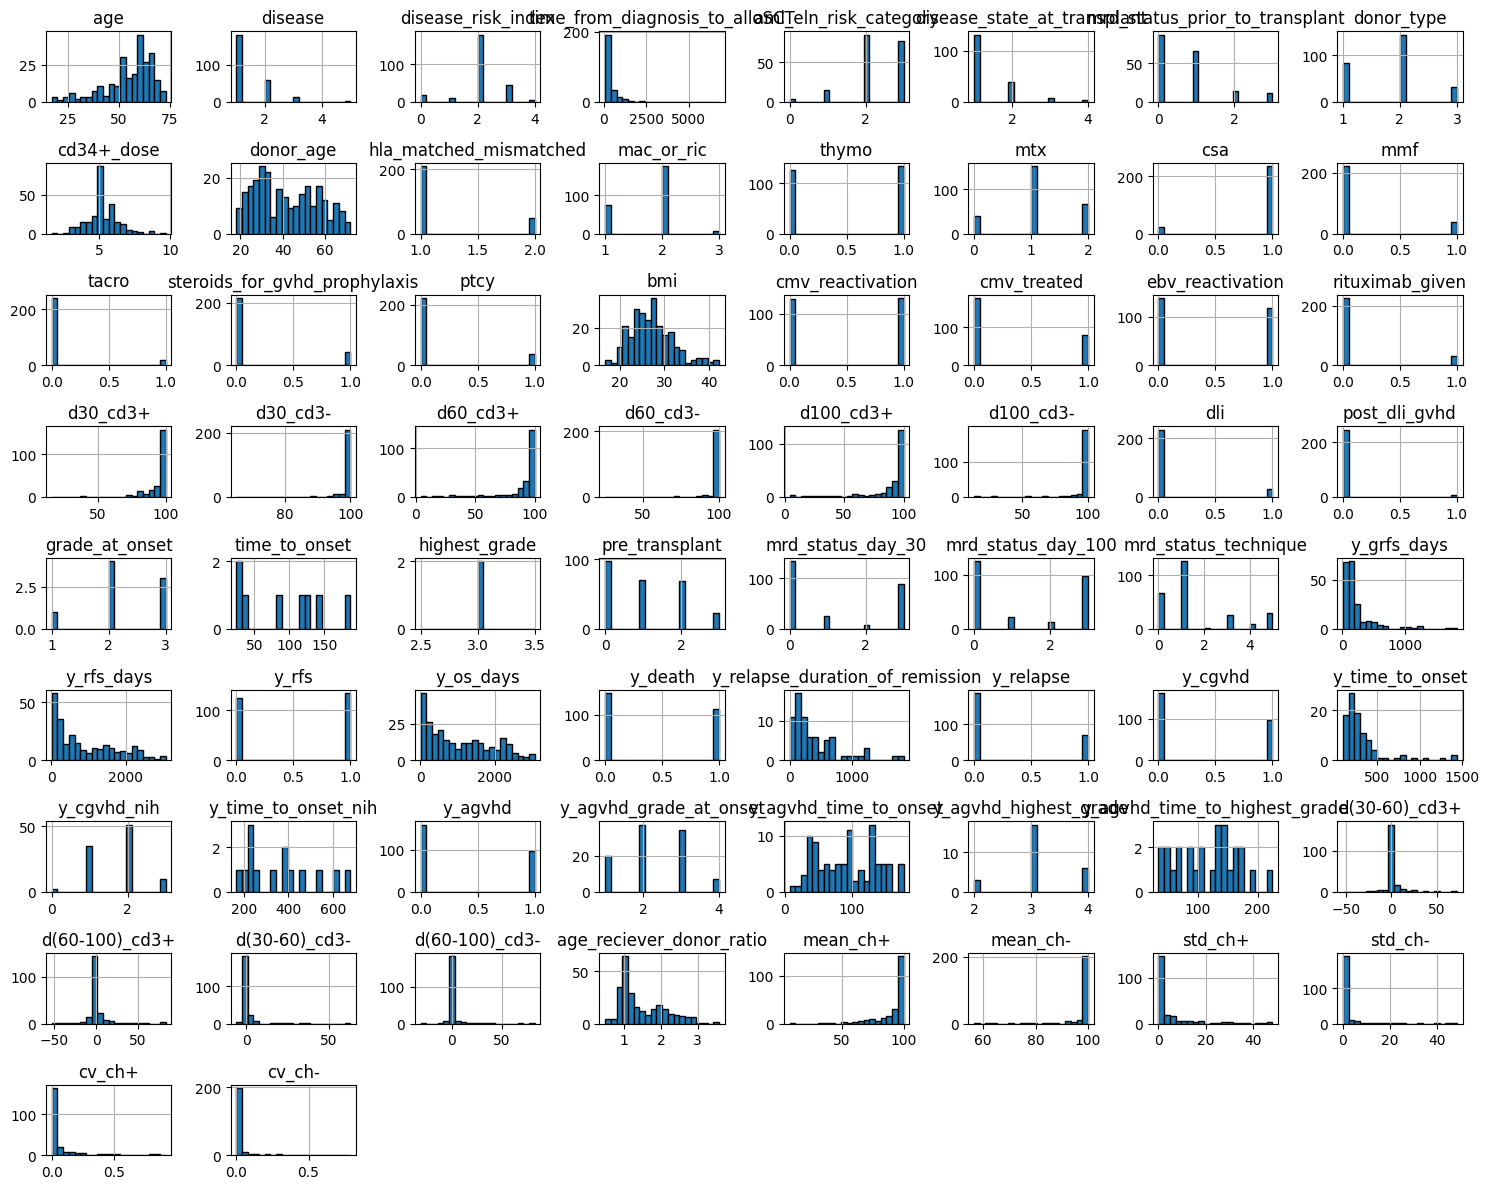

In [6]:
# Assuming df is your DataFrame
df.hist(figsize=(15, 12), bins=20, edgecolor='black')

# Show the plot
plt.tight_layout()
plt.show()

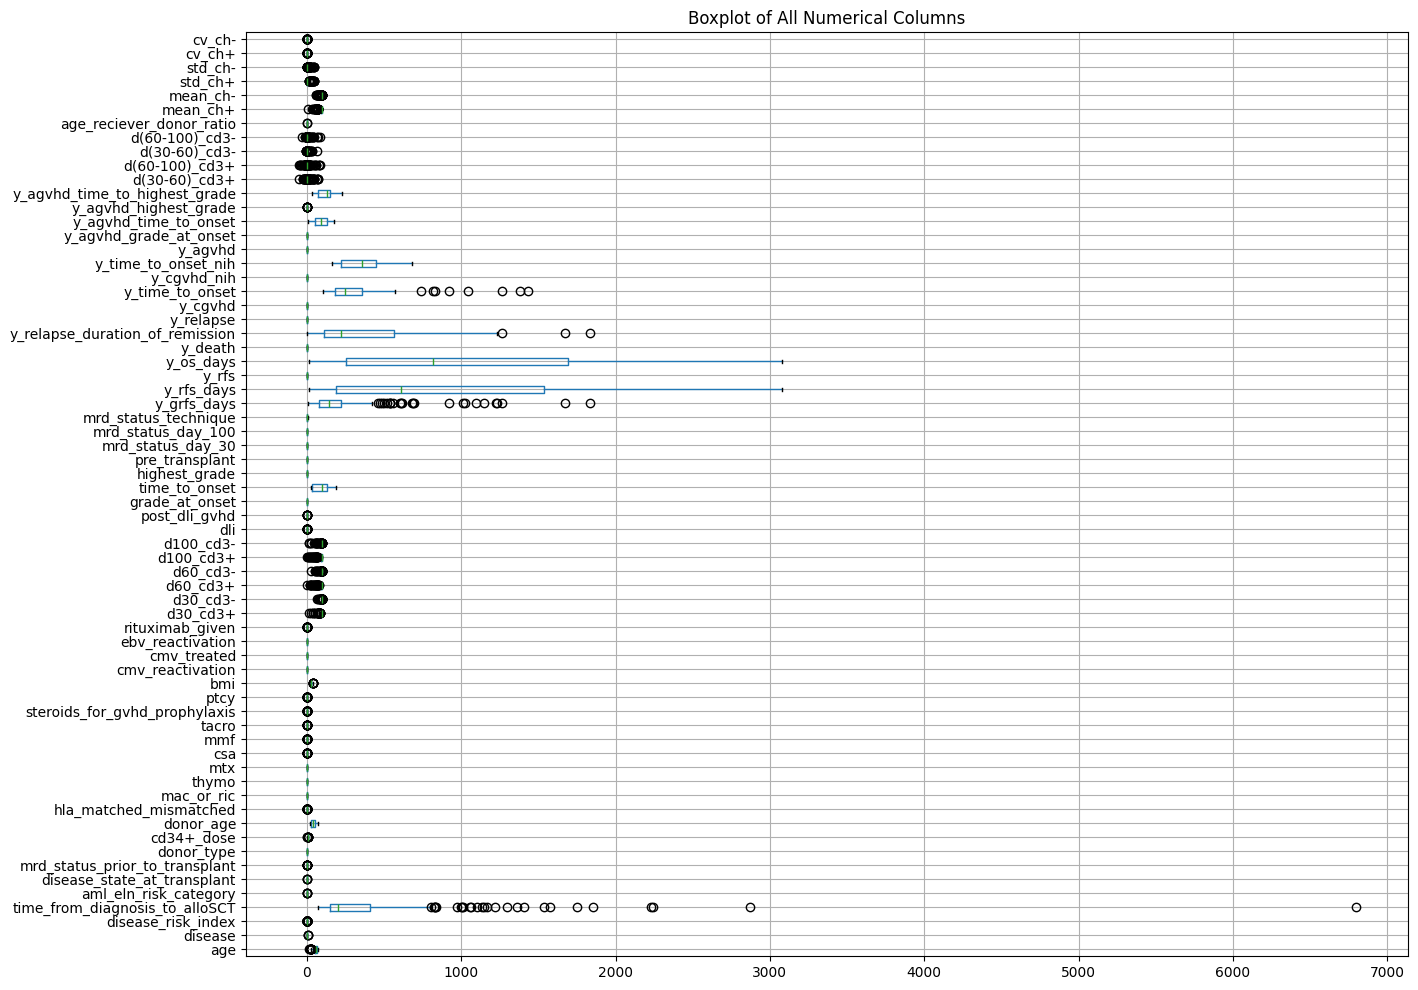

In [7]:
df.boxplot(figsize=(15, 12), vert=False)

# Show the plot
plt.title("Boxplot of All Numerical Columns")
plt.show()

In [8]:
df[["d30_cd3+", "d60_cd3+", "d100_cd3+", "d30_cd3-", "d60_cd3-", "d100_cd3-", "d(30-60)_cd3+", "d(60-100)_cd3+", "d(30-60)_cd3-"]]

,d30_cd3+,d60_cd3+,d100_cd3+,d30_cd3-,d60_cd3-,d100_cd3-,d(30-60)_cd3+,d(60-100)_cd3+,d(30-60)_cd3-
0,87.0,97.0,91.0,88.0,91.0,100.0,-10.0,6.0,-3.0
1,96.0,96.0,96.0,100.0,99.0,100.0,0.0,0.0,1.0
2,99.0,98.0,96.0,100.0,100.0,100.0,1.0,2.0,0.0
3,100.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
4,99.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
253,98.0,99.0,100.0,99.0,98.0,100.0,-1.0,-1.0,1.0
254,98.0,97.0,98.0,98.0,99.0,98.0,1.0,-1.0,-1.0
255,99.0,99.0,59.0,100.0,100.0,95.0,0.0,40.0,0.0
256,NaN,90.0,91.0,NaN,92.0,93.0,NaN,-1.0,NaN


In [9]:
# How does change in chimirisim impact our accuracy results?
# Which labels do have the most effect on our accuracy results?
# assign labels to new features
def assign_labels_vectorized(df, col_a, col_b):
    """
    Vectorized function to assign labels based on values in two columns.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data
    col_a (str): Name of the first column
    col_b (str): Name of the second column
    
    Returns:
    pandas.Series: A series containing the assigned labels
    """
    # Create an empty series with the same index as the dataframe
    result = pd.Series(index=df.index, dtype='object')
    
    # Define conditions and corresponding labels
    conditions = [
        # a == -1 and b == -1
        (df[col_a] == -1) & (df[col_b] == -1),
        # a == 1 and b == 1
        (df[col_a] == 1) & (df[col_b] == 1),
        # a == -1 and b == 1 OR a == 1 and b == -1
        ((df[col_a] == -1) & (df[col_b] == 1)) | ((df[col_a] == 1) & (df[col_b] == -1)),
        # a == 0 and b == 0
        (df[col_a] == 0) & (df[col_b] == 0),
        # a == -1 and b == 0 OR a == 0 and b == -1
        ((df[col_a] == -1) & (df[col_b] == 0)) | ((df[col_a] == 0) & (df[col_b] == -1)),
        # a == 1 and b == 0 OR a == 0 and b == 1
        ((df[col_a] == 1) & (df[col_b] == 0)) | ((df[col_a] == 0) & (df[col_b] == 1))
    ]
    
    # Define corresponding values
    values = ['downward', 'upward', 'fluctuate', 'no_change', 'downward', 'upward']
    
    # Use numpy.select for vectorized assignment
    result = pd.Series(np.select(conditions, values, default='unknown'), index=df.index)
    
    return result

# Example usage:
df['cd3+_label'] = assign_labels_vectorized(df, 'd(30-60)_cd3+', 'd(60-100)_cd3+')
df['cd3-_label'] = assign_labels_vectorized(df, 'd(30-60)_cd3-', 'd(60-100)_cd3-')

df[["d(30-60)_cd3+", "d(60-100)_cd3+", "cd3+_label", "d(30-60)_cd3-", "d(60-100)_cd3-", "cd3-_label"]].head()


# Now groupby y_relapse column and then calculate the portion of each labels for each group of y_relapse, then
# then show the dataframe


# Count occurrences of each label within each group
group_column = "cd3+_label"
label_column = "y_relapse"
grouped = df.groupby([group_column, label_column]).size().unstack(fill_value=0)

# Calculate the total count for each group
grouped['total'] = grouped.sum(axis=1)

# Calculate proportions
for col in grouped.columns:
    if col != 'total':
        grouped[f'{col}_proportion'] = grouped[col] / grouped['total']


print(grouped)
print("\n")

# Count occurrences of each label within each group
group_column = "cd3-_label"
label_column = "y_relapse"
grouped = df.groupby([group_column, label_column]).size().unstack(fill_value=0)

# Calculate the total count for each group
grouped['total'] = grouped.sum(axis=1)

# Calculate proportions
for col in grouped.columns:
    if col != 'total':
        grouped[f'{col}_proportion'] = grouped[col] / grouped['total']


print(grouped)

y_relapse     0   1  total  0_proportion  1_proportion
cd3+_label                                            
downward     14   3     17      0.823529      0.176471
fluctuate    10   6     16      0.625000      0.375000
no_change    31  10     41      0.756098      0.243902
unknown     115  48    163      0.705521      0.294479
upward       17   4     21      0.809524      0.190476


y_relapse    0   1  total  0_proportion  1_proportion
cd3-_label                                           
downward     8   2     10      0.800000      0.200000
fluctuate    4   1      5      0.800000      0.200000
no_change   94  34    128      0.734375      0.265625
unknown     63  26     89      0.707865      0.292135
upward      18   8     26      0.692308      0.307692


# apply descision tree on this data

In [10]:
import warnings
import logging
import sys
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [11]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Set up logging for Jupyter Notebook
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(message)s", force=True)

def optimize_feature_selection(X, y, task="classification", method="select_k_best"):
    """ Perform hyperparameter tuning for feature selection methods """
    if task == "classification":
        score_func = f_classif
        model = RandomForestClassifier(random_state=42)
    else:
        score_func = f_regression
        model = RandomForestRegressor(random_state=42)
    
    if method == "select_k_best":
        # param_grid = {'k': [5, 10, 15, 20, min(25, X.shape[1])]}  # Different values of k
        param_grid = {'k': [1, 2, 3, 5, 8, 10, 13, 21, 34]}  # Different values of k
        
        best_k = param_grid['k'][0]
        best_score = -1
        for k in param_grid['k']:
            selector = SelectKBest(score_func=score_func, k=k)
            X_selected = selector.fit_transform(X, y)
            
            # Get selected feature names
            selected_indices = selector.get_support(indices=True)
            selected_features = X.columns[selected_indices].tolist()
            print(f"Selected features for k={k}: {selected_features}")
            
            score = np.mean(cross_val_score(model, X_selected, y, cv=5, scoring='accuracy' if task == "classification" else 'neg_mean_squared_error'))
            print(f"{k}: {score}")
            if score > best_score:
                best_k, best_score = k, score
        print(f"{best_k = }")
        return SelectKBest(score_func=score_func, k=best_k).fit_transform(X, y)
    
    elif method == "rfe":
        param_grid = {'n_features_to_select': [5, 10, 15, 20, min(25, X.shape[1])]}  # Different values of n_features
        best_features = param_grid['n_features_to_select'][0]
        best_score = -1
        for n in param_grid['n_features_to_select']:
            selector = RFE(model, n_features_to_select=n)
            X_selected = selector.fit_transform(X, y)
            score = np.mean(cross_val_score(model, X_selected, y, cv=5, scoring='accuracy' if task == "classification" else 'neg_mean_squared_error'))
            if score > best_score:
                best_features, best_score = n, score
        return RFE(model, n_features_to_select=best_features).fit_transform(X, y)
    
    elif method == "feature_importance":
        model.fit(X, y)
        importance_scores = model.feature_importances_
        thresholds = np.linspace(0.005, 0.05, 5)  # Test different threshold values
        best_threshold = thresholds[0]
        best_score = -1
        for threshold in thresholds:
            selected_features = X.columns[importance_scores > threshold]
            X_selected = X[selected_features]
            if X_selected.shape[1] == 0:
                continue
            score = np.mean(cross_val_score(model, X_selected, y, cv=5, scoring='accuracy' if task == "classification" else 'neg_mean_squared_error'))
            if score > best_score:
                best_threshold, best_score = threshold, score
        return X[X.columns[importance_scores > best_threshold]]
    
    else:
        raise ValueError("Invalid method. Choose from 'select_k_best', 'rfe', or 'feature_importance'.")
    

def plot_classification_results(results):
    methods = list(results.keys())  # Feature selection methods
    classifiers = ["Random Forest", "SVM", "Naive Bayes"]  # Model names
    
    # Create two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    
    num_methods = len(methods)
    for method_idx, method in enumerate(methods):
        labels = list(results[method].keys())  # Classification labels
        x = np.arange(len(labels))  # Positions for bars
        width = 0.25 / num_methods  # Adjusted for spacing
        
        for i, model in enumerate(classifiers):
            # Get accuracies and their STDs
            accuracies = []
            accuracy_stds = []
            f1_scores = []
            f1_stds = []
            
            for label in labels:
                if model in results[method][label]:
                    accuracies.append(results[method][label][model]["accuracy"])
                    accuracy_stds.append(results[method][label][model]["accuracy_std"])
                    f1_scores.append(results[method][label][model]["f1_score"])
                    f1_stds.append(results[method][label][model]["f1_std"])
                else:
                    accuracies.append(0)
                    accuracy_stds.append(0)
                    f1_scores.append(0)
                    f1_stds.append(0)
            
            # Plot accuracy bars with error bars
            position = x + (i + method_idx * len(classifiers)) * width
            ax1.bar(position, accuracies, width=width, 
                   label=f"{method} - {model}")
            ax1.errorbar(position, accuracies, yerr=accuracy_stds, 
                        fmt='none', color='black', capsize=3)
            
            # Plot F1 score bars with error bars
            ax2.bar(position, f1_scores, width=width, 
                   label=f"{method} - {model}")
            ax2.errorbar(position, f1_scores, yerr=f1_stds, 
                        fmt='none', color='black', capsize=3)
    
    # Customize first subplot (Accuracy)
    ax1.set_xticks(x + (num_methods * len(classifiers) * width) / 2)
    ax1.set_xticklabels(labels, rotation=45)
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1)
    ax1.set_title('Classification Accuracy Across Feature Selection Methods')
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Customize second subplot (F1 Score)
    ax2.set_xticks(x + (num_methods * len(classifiers) * width) / 2)
    ax2.set_xticklabels(labels, rotation=45)
    ax2.set_ylabel('F1 Score')
    ax2.set_ylim(0, 1)
    ax2.set_title('F1 Scores Across Feature Selection Methods')
    ax2.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Add legend to the right of both plots
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))
    
    plt.tight_layout()
    plt.show()


def plot_regression_results(results):
    methods = list(results.keys())  # Feature selection methods
    regressors = ["Random Forest", "SVM"]  # Model names
    num_methods = len(methods)

    plt.figure(figsize=(14, 7))

    for method_idx, method in enumerate(methods):
        labels = list(results[method].keys())  # Regression labels
        x = np.arange(len(labels))  # Positions for bars
        width = 0.25 / num_methods  # Adjusted for spacing

        for i, model in enumerate(regressors):
            percentage_errors = [
                results[method][label][model]["percentage_error"] if model in results[method][label] else 0
                for label in labels
            ]
            plt.bar(x + (i + method_idx * len(regressors)) * width, percentage_errors, width=width, label=f"{method} - {model}")

    plt.xticks(x + (num_methods * len(regressors) * width) / 2, labels, rotation=45)
    plt.ylabel('Mean Percentage Error (%)')
    plt.title('Regression Mean Percentage Error Across Feature Selection Methods')
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Move legend to the right
    plt.tight_layout()
    plt.show()


def load_data(file_path, sheet_name="Sheet1", skip_rows=2):
    logging.info("Loading dataset...")
    df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=skip_rows)
    # df.dropna(axis=1, how='all', inplace=True)
    df.dropna(axis=0, how='all', inplace=True)
    return df

def map_excel_columns(df):
    column_mapping = {}
    for idx, col_name in enumerate(df.columns):
        col_letter = ""
        col_number = idx + 1
        while col_number > 0:
            col_number, remainder = divmod(col_number - 1, 26)
            col_letter = chr(65 + remainder) + col_letter
        column_mapping[col_letter] = col_name
    return column_mapping

def extract_features_labels(df, excel_mapping, feature_cols, class_labels, reg_labels):
    features = [excel_mapping[col] for col in feature_cols if col in excel_mapping]
    class_names = [excel_mapping[col] for col in class_labels if col in excel_mapping]
    reg_names = [excel_mapping[col] for col in reg_labels if col in excel_mapping]

    df = df[df["Disease"] == 1]
    
    X = df[features].copy()
    y_classification = df[class_names].copy()
    y_regression = df[reg_names].copy()

    X.reset_index(drop=True, inplace=True)
    y_classification.reset_index(drop=True, inplace=True)
    y_regression.reset_index(drop=True, inplace=True)
    
    return X, y_classification, y_regression

def preprocess_data(X):
    logging.info("Preprocessing features...")
    for col in X.select_dtypes(include=['datetime64']).columns:
        X[col] = X[col].apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    imputer = SimpleImputer(strategy="mean")
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)
    return X_scaled

def preprocess_labels(y_classification):
    for col in y_classification.columns:
        if y_classification[col].dtype in ['float64', 'int64']:
            y_classification[col] = pd.cut(y_classification[col], bins=[-np.inf, 0, np.inf], labels=[0, 1])
        y_classification[col] = LabelEncoder().fit_transform(y_classification[col].astype(str))
    y_classification.fillna(y_classification.mode().iloc[0], inplace=True)
    y_classification = y_classification.loc[:, y_classification.nunique() > 1]
    return y_classification

def preprocess_regression_labels(y_regression):
    for col in y_regression.columns:
        y_regression[col] = pd.to_numeric(y_regression[col], errors='coerce')
        y_regression[col].fillna(y_regression[col].median(), inplace=True)
    return y_regression

def train_classification_models(X, y_classification, feature_selection_method="select_k_best", cv=5, k=10, save_dir="models"):
    """ Train classification models with cross-validation and feature selection for each label separately """
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42),
    }
    
    classification_results = {}
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for label in y_classification.columns:
        y_label = y_classification[label].dropna()  # Ensure no missing values
        X_label = X.loc[y_label.index]  # Get corresponding rows
        
        if len(y_label.unique()) > 1:  # Ensure multiple classes exist
            # Apply feature selection for this label
            X_selected = optimize_feature_selection(X_label, y_label, task="classification", method=feature_selection_method)
            classification_results[label] = {}

            for model_name, model in classifiers.items():
                grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
                grid_search.fit(X_selected, y_label)
                best_model = grid_search.best_estimator_

                # Save the model using joblib
                
                model_filename = f"{save_dir}/{label}_{model_name.replace(' ', '_')}_{X_selected.shape[1]}.joblib"
                print(f"{model_filename = }")
                joblib.dump(best_model, model_filename)
                
                accuracy_scores = cross_val_score(best_model, X_selected, y_label, cv=kf, scoring='accuracy')
                f1_scores = cross_val_score(best_model, X_selected, y_label, cv=kf, scoring='f1_macro')
                y_pred = cross_val_predict(best_model, X_selected, y_label, cv=kf)
                
                classification_results[label][model_name] = {
                    "best_model_params": grid_search.best_params_,
                    "accuracy": np.mean(accuracy_scores),  # Mean accuracy across folds
                    "accuracy_std": np.std(accuracy_scores),  # STD accuracies
                    "f1_score": np.mean(f1_scores),  # Mean F1 score across folds
                    "f1_std": np.std(f1_scores),  # STD of F1 scores
                    "report": classification_report(y_label, y_pred, output_dict=True)
                }

    return classification_results


def train_regression_models(X, y_regression, feature_selection_method="select_k_best", cv=5, k=10):
    """ Train regression models with cross-validation and feature selection for each label separately """
    regressors = {
        "Random Forest": RandomForestRegressor(random_state=42),
        "SVM": SVR()
    }

    regression_results = {}
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for label in y_regression.columns:
        y_label = y_regression[label].dropna()  # Ensure no missing values
        X_label = X.loc[y_label.index]  # Get corresponding rows

        # Apply feature selection for this label
        X_selected = select_features(X_label, y_label, task="regression", method=feature_selection_method, k=k)

        regression_results[label] = {}

        for model_name, model in regressors.items():
            # Cross-validated predictions
            y_pred = cross_val_predict(model, X_selected, y_label, cv=kf)

            # Compute percentage error
            percentage_errors = np.abs((y_pred - y_label) / y_label) * 100
            mean_percentage_error = np.mean(percentage_errors)

            # Compute standard regression metrics
            mae = mean_absolute_error(y_label, y_pred)
            mse = mean_squared_error(y_label, y_pred)
            rmse = np.sqrt(mse)

            regression_results[label][model_name] = {
                "mae": mae,
                "mse": mse,
                "rmse": rmse,
                "percentage_error": mean_percentage_error
            }

    return regression_results


def fill_na_values(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    print(f"{categorical_cols = }")
    
    # 1. For columns with very few NaN values (like time_from_diagnosis_to_alloSCT)
    # Simple median imputation might be adequate
    simple_imputer = SimpleImputer(strategy='median')
    df[numerical_cols] = simple_imputer.fit_transform(df[numerical_cols])
    
    # 2. For more sophisticated imputation, you can use MICE 
    # (Multivariate Imputation by Chained Equations) which accounts for relationships between features
    # This is more computationally expensive but generally more accurate
    # mice_imputer = IterativeImputer(max_iter=10, random_state=0)
    # df[numerical_cols] = mice_imputer.fit_transform(df[numerical_cols])
    
    # 3. For features that might depend on similar records, KNN imputation can be useful
    # For example, clinical data where similar patients might have similar values
    # knn_imputer = KNNImputer(n_neighbors=5)
    # df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])
    
    # 5. For categorical columns (if you have any - your info shows only numeric types)
    # Use mode imputation
    if categorical_cols:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    return df


def select_features_and_train(X, y, save_path='models'):
    """
    Selects specific feature sets based on k values and trains random forest models.
    
    Parameters:
    -----------
    X : DataFrame
        The feature dataframe containing all possible features
    y : Series or array
        Target variable
    save_path : str, default='models'
        Directory to save the trained models
    
    Returns:
    --------
    dict
        Dictionary of trained models and their performance scores
    """
    # Create directory if it doesn't exist
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    # Define feature sets based on k values
    feature_sets = {
        1: ['d(60-100)_cd3+'],
        2: ['d(60-100)_cd3+', 'd(60-100)_cd3-'],
        3: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-'],
        5: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'std_ch+', 'std_ch-']
    }
    
    # Initialize classifier
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42)
    }
    
    results = {}
    
    # For each k value, select features, train model and save
    for k, features in feature_sets.items():
        print(f"Training model with k={k}, features: {features}")
        
        # Check if all features exist in the dataframe
        missing_features = [f for f in features if f not in X.columns]
        if missing_features:
            print(f"Warning: Features {missing_features} not found in the dataset. Skipping k={k}.")
            continue
            
        # Select features
        X_selected = X[features]
        
        model_results = {}
        
        # Train each classifier
        for name, clf in classifiers.items():
            # Fit the model
            clf.fit(X_selected, y)
            
            # Save the model
            model_filename = os.path.join(save_path, f"{name.replace(' ', '_')}_k{k}.joblib")
            joblib.dump(clf, model_filename)
            print(f"Model saved to {model_filename}")
            
            # Store the model and its features
            model_results[name] = {
                'model': clf,
                'features': features,
                'filename': model_filename
            }
        
        results[k] = model_results
    
    return results

# Fill the NaN values

You have a dataset with some missing (NaN) values that you need to handle before using it for machine learning. Handling missing values is an important preprocessing step. Here's my recommendation:

Looking at your data, you have different types of features (numerical continuous, categorical) and varying amounts of missing data. A single approach may not be optimal for all columns, so I'll provide a comprehensive solution.

Here's a Python code solution using pandas and scikit-learn:

```python
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming your dataframe is called 'df'
# First, let's separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 1. For columns with very few NaN values (like time_from_diagnosis_to_alloSCT)
# Simple median imputation might be adequate
simple_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = simple_imputer.fit_transform(df[numerical_cols])

# 2. For more sophisticated imputation, you can use MICE 
# (Multivariate Imputation by Chained Equations) which accounts for relationships between features
# This is more computationally expensive but generally more accurate
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
df[numerical_cols] = mice_imputer.fit_transform(df[numerical_cols])

# 3. For features that might depend on similar records, KNN imputation can be useful
# For example, clinical data where similar patients might have similar values
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

# 4. For columns with many missing values (like grade_at_onset with only 7 non-null values)
# Consider if these should be included at all or treated specially
# You might want to create a binary indicator for whether the value was missing
df['grade_at_onset_missing'] = df['grade_at_onset'].isna().astype(int)

# 5. For categorical columns (if you have any - your info shows only numeric types)
# Use mode imputation
if categorical_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
```

Since you're preparing features for a machine learning method, here are some additional considerations:

1. For columns with very few non-null values (like "grade_at_onset" which has only 7 non-null values out of 182), consider whether these should be included at all.

2. Consider creating "missing value indicator" features, which can be useful if the missingness itself is informative (e.g., in medical data, certain tests may only be performed under specific conditions).

3. For some specific medical data, domain-specific imputation might be more appropriate. For example, for lab values, you might want to impute with normal ranges.

4. Depending on your ML model, you might want to normalize or standardize your data after imputation.

Would you like me to adapt this code for your specific use case or focus on any particular columns that are more important for your analysis?

In [12]:
# Define feature and label columns
df = df[df["disease"] == 1]

# Fill NaN Values based on above explaination
feature_cols = [col for col in df.columns if not col.startswith("y_")]
print(f"{len(feature_cols) = }")
for col in feature_cols[:]:
    if col.strip() in ["dose_dli", "dose_dli_2","indication_for_dli", "post_dli_gvhd", "grade_at_onset", "time_to_onset", "highest_grade", "dli", "aml_eln_risk_category", "disease_risk_index", "time_from_diagnosis_to_alloSCT", "hct_ci_score"]:
        feature_cols.remove(col)

print(f"{'time_to_onset' in feature_cols = }")
print(f"{len(feature_cols) = }")

regression_labels = ["y_os_days", "y_rfs_days"]
classification_labels = [col for col in df.columns if col.startswith("y_") and (not col in regression_labels)]

print(f"{len(classification_labels) = }")
for col in classification_labels[:]:
    if len(df[col].dropna()) != len(df):
        classification_labels.remove(col)

print(f"{len(classification_labels) = }")
print(f"{classification_labels = }")
print(f"{regression_labels = }")

df.dropna(subset=["d100_cd3+"], inplace = True)

X = df[feature_cols].copy()
y_classification = df[classification_labels].copy()
y_regression = df[regression_labels].copy()
X = fill_na_values(X)
X.reset_index(drop=True, inplace=True)
y_classification.reset_index(drop=True, inplace=True)
y_regression.reset_index(drop=True, inplace=True)

X_preprocessed = preprocess_data(X)
y_classification = preprocess_labels(y_classification)
# y_classification = pd.DataFrame(y_classification["y_relapse"], columns=["y_relapse"])
y_regression = preprocess_regression_labels(y_regression)

len(feature_cols) = 60
'time_to_onset' in feature_cols = False
len(feature_cols) = 48
len(classification_labels) = 15
len(classification_labels) = 5
classification_labels = ['y_rfs', 'y_death', 'y_relapse', 'y_cgvhd', 'y_agvhd']
regression_labels = ['y_os_days', 'y_rfs_days']
categorical_cols = ['degree_of_match', 'conditioning_regimen', 'neutrophil_engraftment', 'platelet_engraftment', 'cd3+_label', 'cd3-_label']
Preprocessing features...


In [13]:
X_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             157 non-null    float64
 1   disease                         157 non-null    float64
 2   disease_state_at_transplant     157 non-null    float64
 3   mrd_status_prior_to_transplant  157 non-null    float64
 4   donor_type                      157 non-null    float64
 5   cd34+_dose                      157 non-null    float64
 6   donor_age                       157 non-null    float64
 7   hla_matched_mismatched          157 non-null    float64
 8   degree_of_match                 157 non-null    float64
 9   mac_or_ric                      157 non-null    float64
 10  conditioning_regimen            157 non-null    float64
 11  thymo                           157 non-null    float64
 12  mtx                             157 

In [14]:
X["platelet_engraftment"].unique()

array([24,  5,  8,  9, 31, 33, 32, 20, 11, 37, 14, 18, 42, 38, 29, 15, 36,
       26,  6, 10, 28, 40, 25, 22, 23, 41, 13,  7, 16,  4, 39, 12, 34,  0,
       27, 17,  3, 19, 30,  1, 21, 35, 43,  2])

In [15]:
y_classification

,y_rfs,y_death,y_relapse,y_cgvhd,y_agvhd
0,1,1,1,0,1
1,1,1,1,0,0
2,0,0,0,1,1
3,0,0,0,0,1
4,0,0,0,0,0
...,...,...,...,...,...
152,1,1,0,1,1
153,0,0,0,1,0
154,0,0,0,1,0
155,1,1,1,0,0


In [ ]:
df.info()

In [ ]:
X.info()

              y_rfs   y_death  y_relapse   y_cgvhd   y_agvhd
y_rfs      1.000000  0.797856   0.693280 -0.354742  0.137960
y_death    0.797856  1.000000   0.382081 -0.363639  0.183674
y_relapse  0.693280  0.382081   1.000000 -0.293047 -0.114080
y_cgvhd   -0.354742 -0.363639  -0.293047  1.000000  0.014378
y_agvhd    0.137960  0.183674  -0.114080  0.014378  1.000000


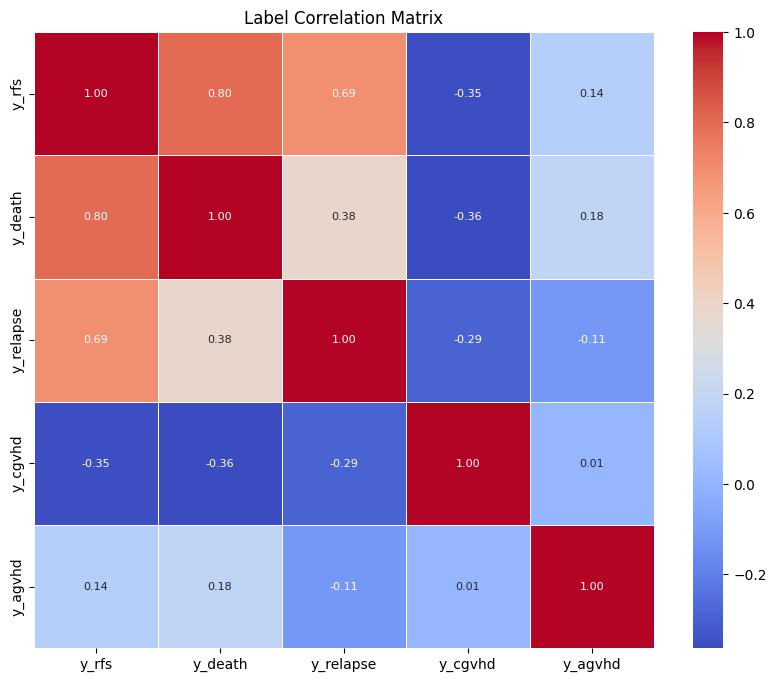

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
correlation_matrix = y_classification.corr()

# Display correlation matrix
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.title("Label Correlation Matrix")
plt.show()


🔹 Running Feature Selection with select_k_best 🔹

Selected features for k=1: ['std_ch-']
1: 0.5868951612903225
Selected features for k=2: ['d(60-100)_cd3+', 'std_ch-']
2: 0.6058467741935483
Selected features for k=3: ['d(60-100)_cd3+', 'std_ch-', 'cv_ch-']
3: 0.625
Selected features for k=5: ['d100_cd3-', 'd(60-100)_cd3+', 'mean_ch-', 'std_ch-', 'cv_ch-']
5: 0.5489919354838709
Selected features for k=8: ['cmv_treated', 'd100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'mean_ch-', 'std_ch+', 'std_ch-', 'cv_ch-']
8: 0.5993951612903226
Selected features for k=10: ['cmv_treated', 'd100_cd3+', 'd100_cd3-', 'mrd_status_day_100', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'mean_ch-', 'std_ch+', 'std_ch-', 'cv_ch-']
10: 0.6443548387096774
Selected features for k=13: ['thymo', 'steroids_for_gvhd_prophylaxis', 'cmv_treated', 'ebv_reactivation', 'd100_cd3+', 'd100_cd3-', 'mrd_status_day_100', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'mean_ch-', 'std_ch+', 'std_ch-', 'cv_ch-']
13: 0.5927419354838709
Selected 

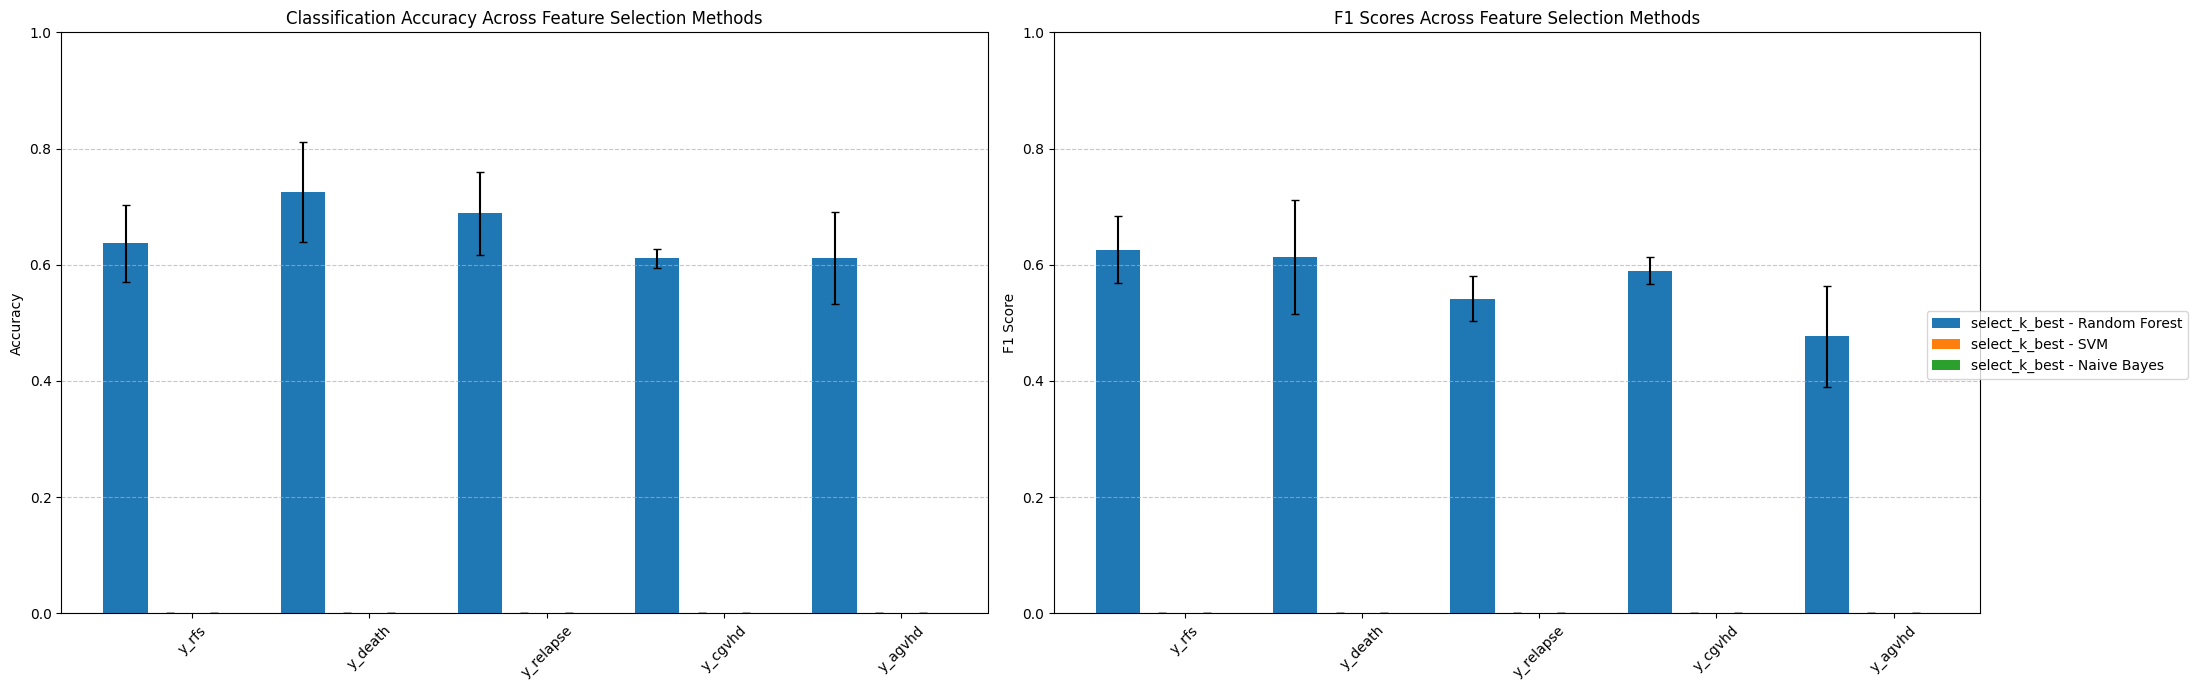

In [10]:
# feature_selection_methods = ["select_k_best", "rfe", "feature_importance", "pca"]
# feature_selection_methods = ["select_k_best", "rfe", "feature_importance"]
feature_selection_methods = ["select_k_best"]

classification_results_all = {}
regression_results_all = {}

for method in feature_selection_methods:
    print(f"\n🔹 Running Feature Selection with {method} 🔹\n")
    
    # Train Classification Models
    classification_results = train_classification_models(X, y_classification, feature_selection_method=method, k=15)

    # Train Regression Models
    # regression_results = train_regression_models(X, y_regression, feature_selection_method=method, k=10)

    # Store Results
    classification_results_all[method] = classification_results
    # regression_results_all[method] = regression_results

    print(f"\n✅ Completed Feature Selection with {method} ✅\n")


plot_classification_results(classification_results_all)
# plot_regression_results(regression_results_all)

In [ ]:
# Permutation Importance

# Randomly shuffle values of a single feature while keeping others unchanged
# Measure the decrease in model performance
# Features that cause larger drops when shuffled are more important

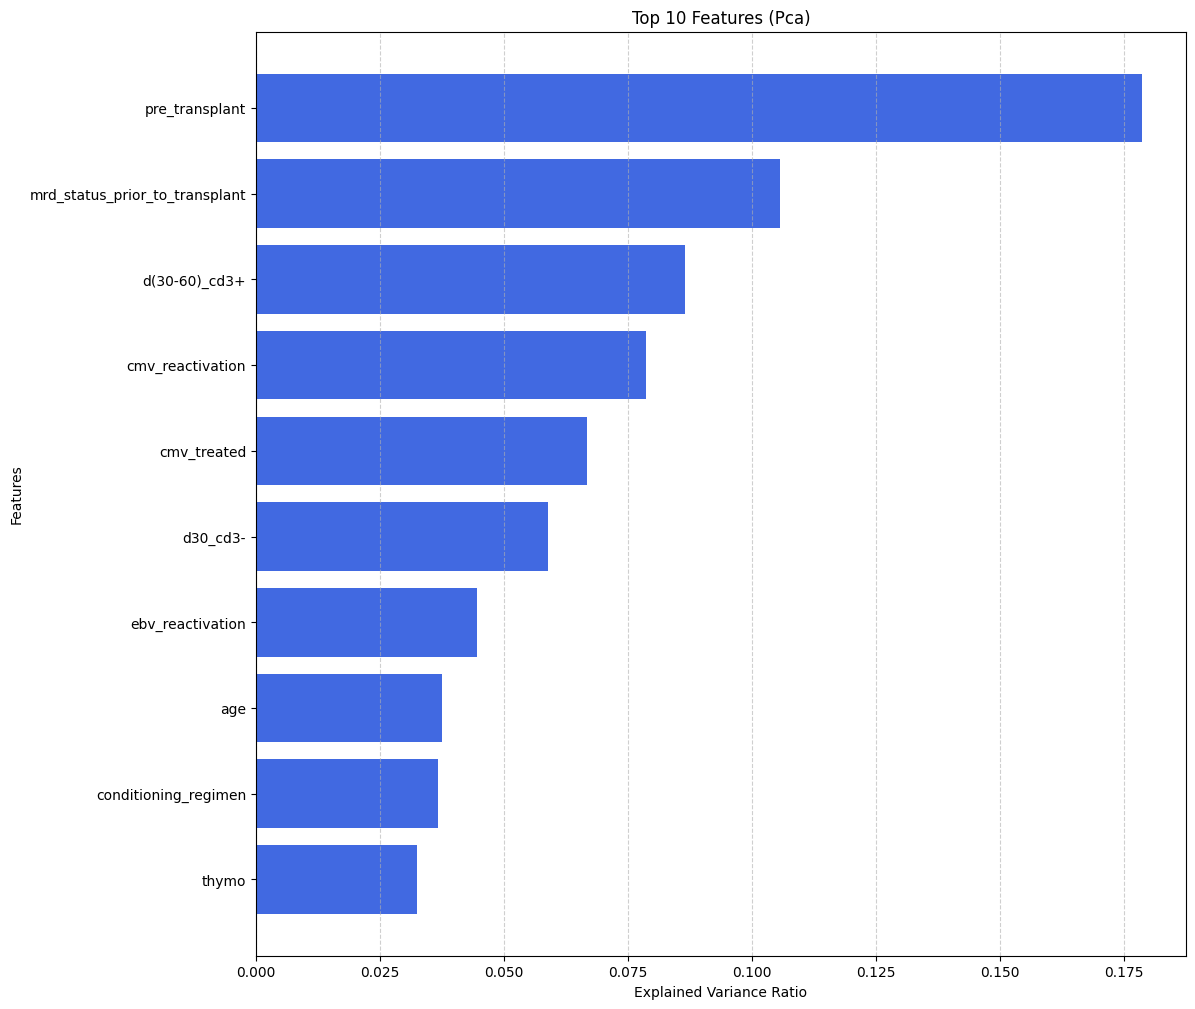

y_rfs




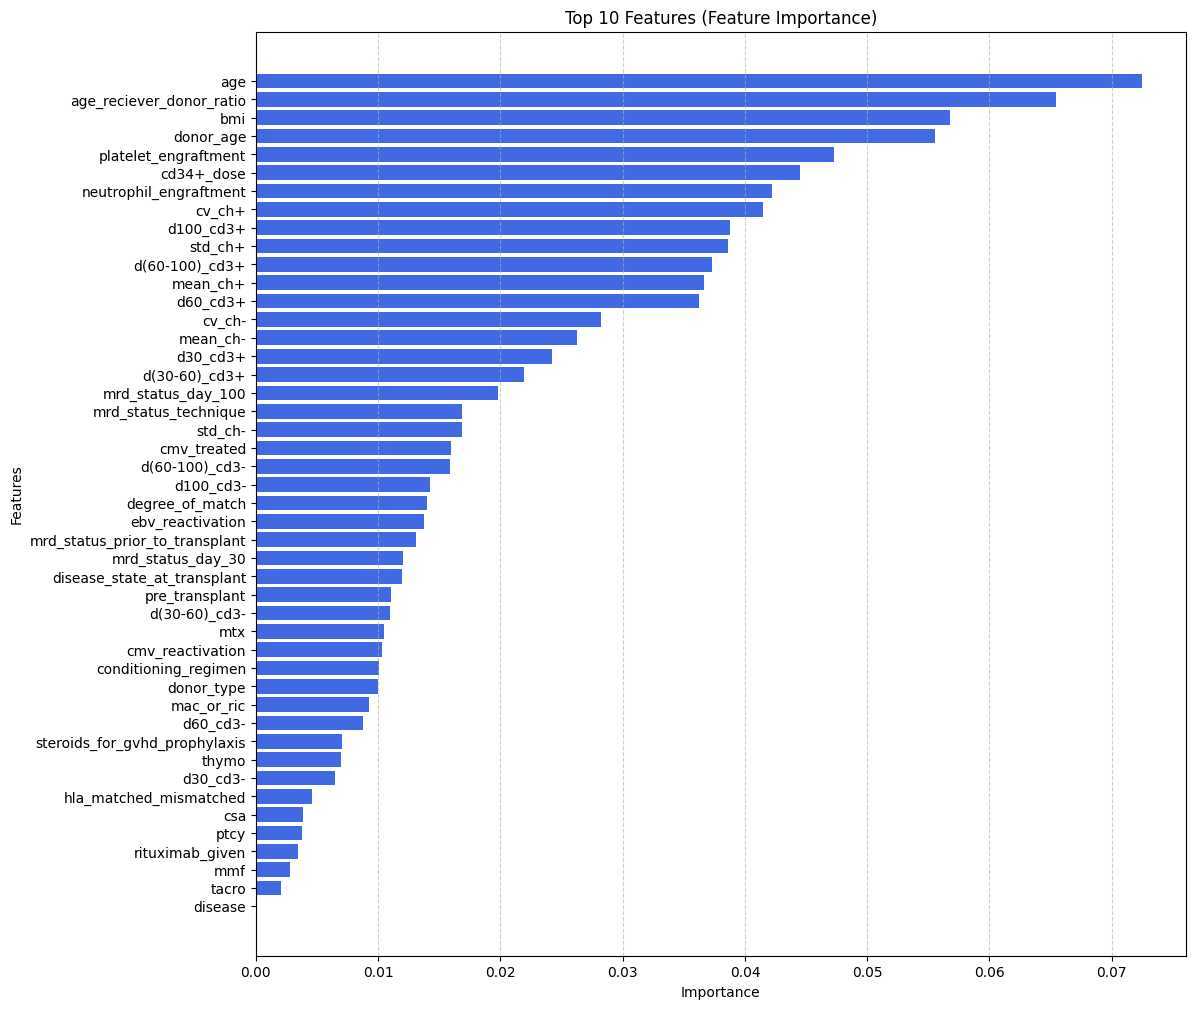

y_death




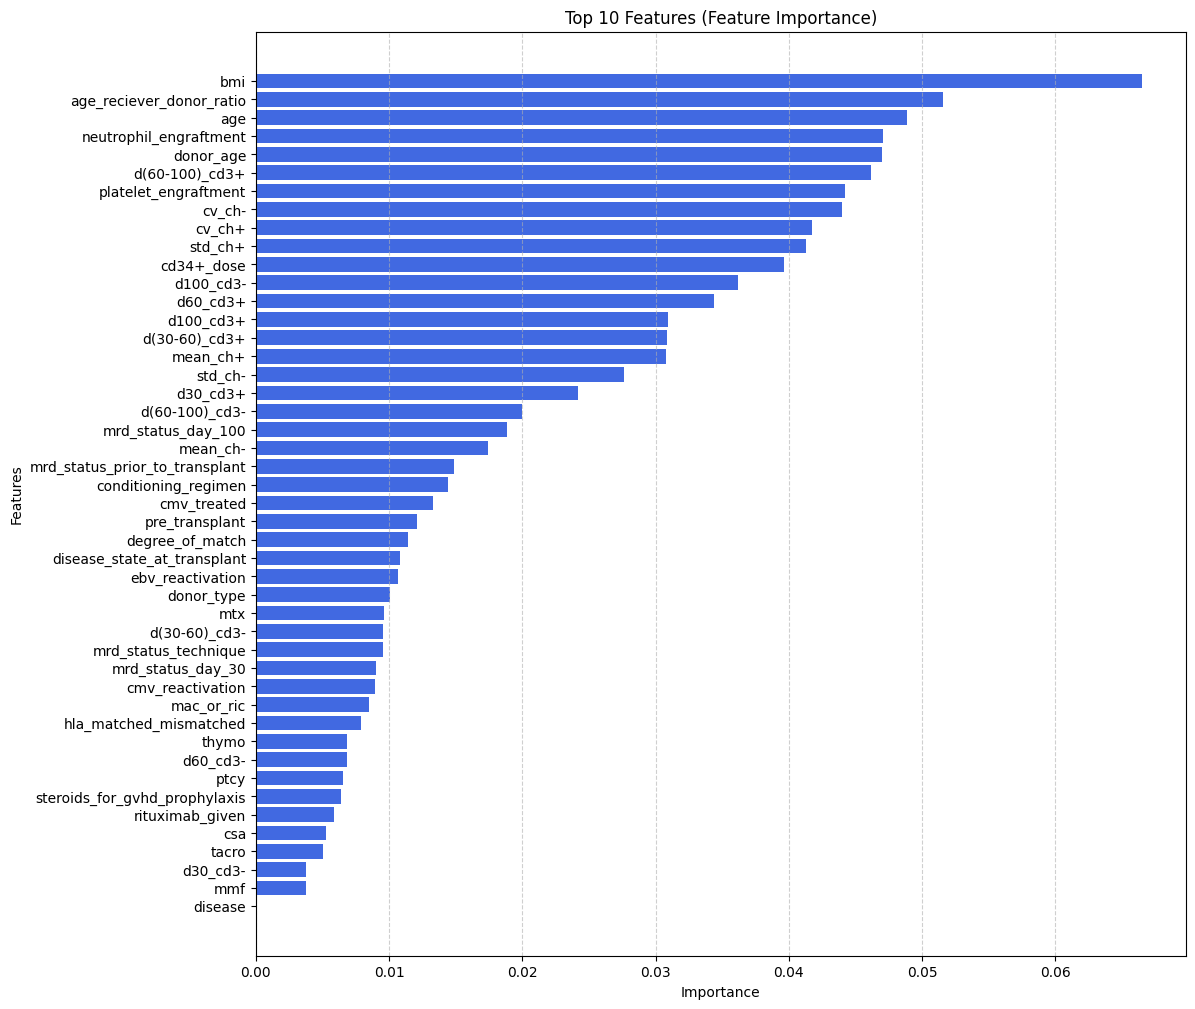

y_relapse




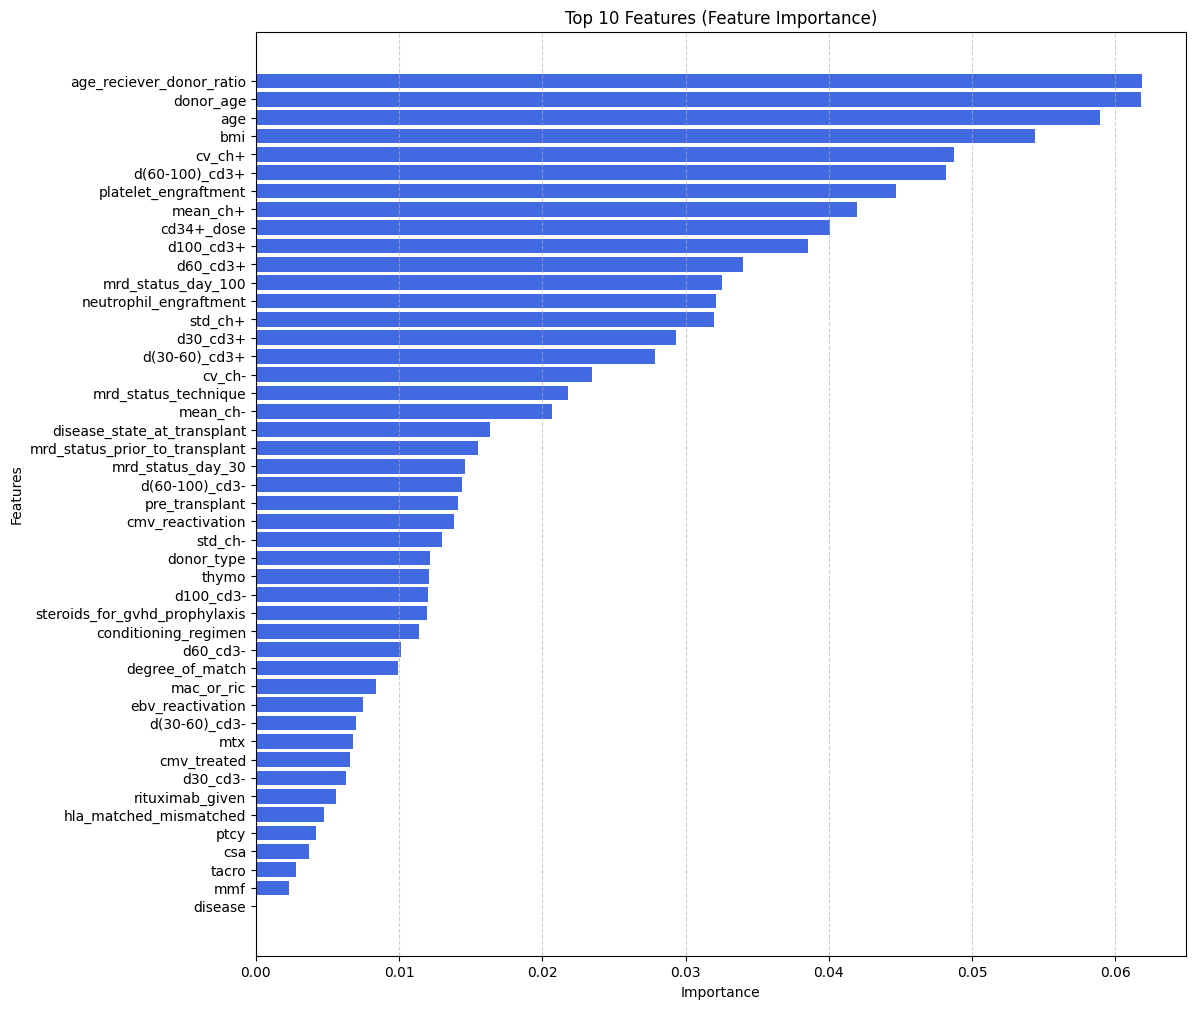

y_cgvhd




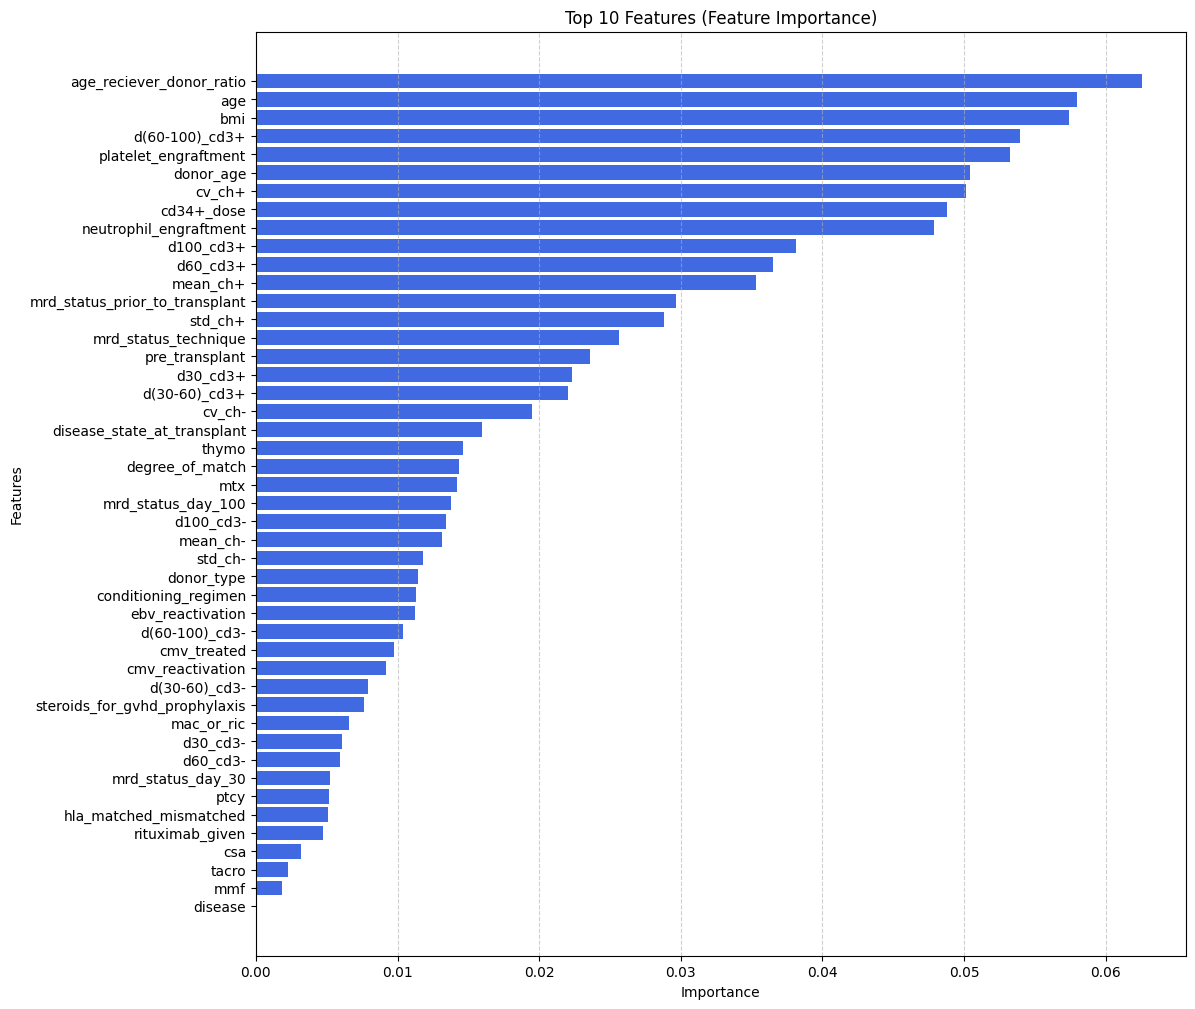

y_agvhd




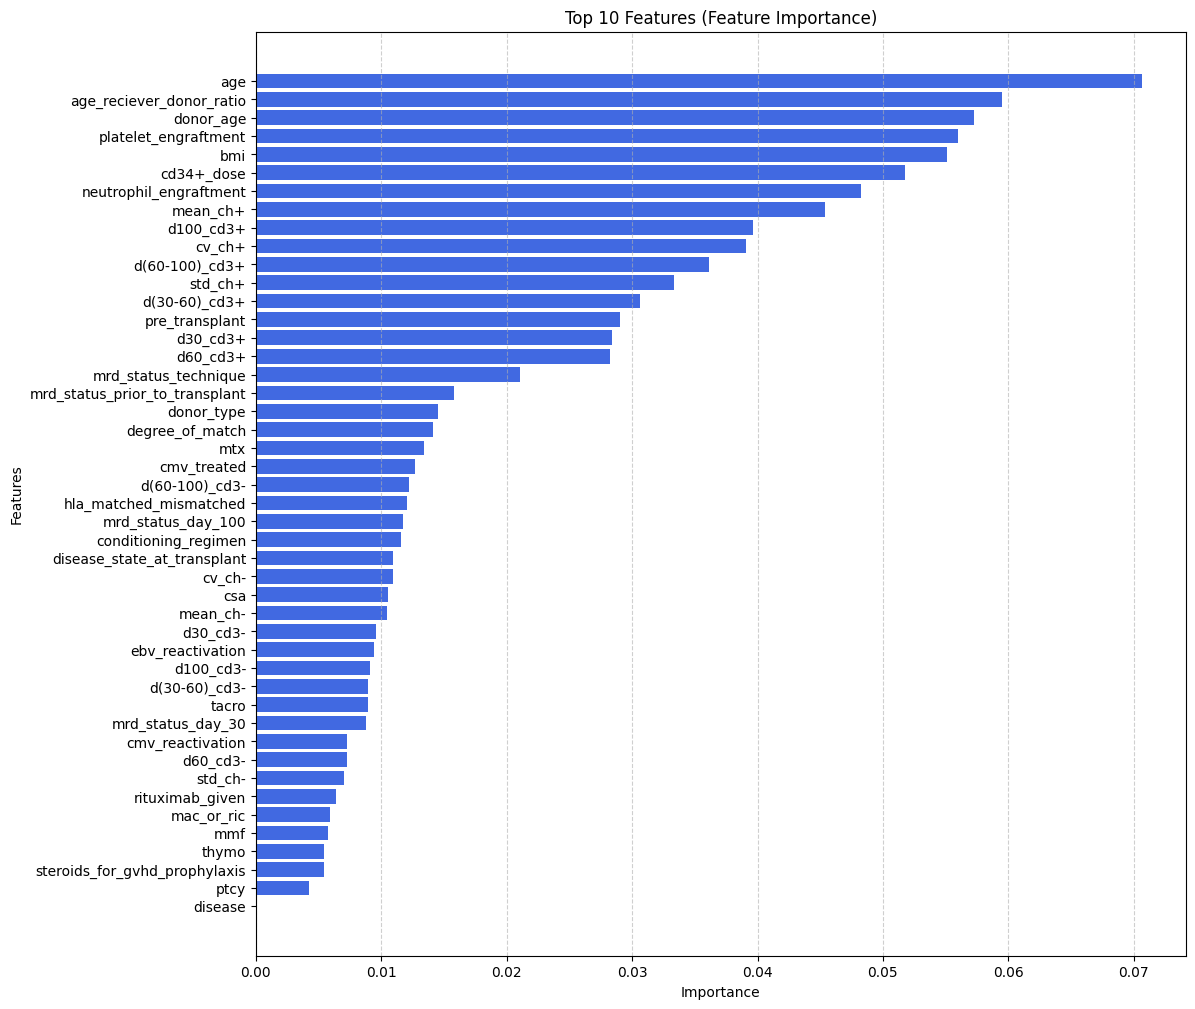

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_feature_importance(X, y, task="classification", method="feature_importance", n_components=10):
    """ Plot feature importance using different methods """
    if task == "classification":
        model = RandomForestClassifier(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)

    if method == "feature_importance":
        model.fit(X, y)
        importance_scores = model.feature_importances_
        sorted_indices = np.argsort(importance_scores)[::-1]
        sorted_features = X.columns[sorted_indices]
        sorted_scores = importance_scores[sorted_indices]
    
    elif method == "pca":
        pca = PCA(n_components=min(n_components, X.shape[1]))
        X_pca = pca.fit_transform(X)
        sorted_indices = np.argsort(pca.components_.sum(axis=0))[::-1]
        sorted_features = X.columns[sorted_indices][:n_components]
        sorted_scores = pca.explained_variance_ratio_[:n_components]
    
    else:
        raise ValueError("Invalid method. Choose from 'feature_importance' or 'pca'.")
    
    # Plot
    plt.figure(figsize=(12, 12))
    plt.barh(sorted_features[::-1], sorted_scores[::-1], color='royalblue')
    plt.xlabel("Importance" if method == "feature_importance" else "Explained Variance Ratio")
    plt.ylabel("Features")
    plt.title(f"Top {n_components} Features ({method.replace('_', ' ').title()})")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

plot_feature_importance(X_preprocessed, y_classification.iloc[:, 0], task="classification", method="pca")

for idx in range(5):
    print(f"{y_classification.columns[idx]}")
    print(f"\n")
    plot_feature_importance(X_preprocessed, y_classification.iloc[:, idx], task="classification", method="feature_importance")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA

def plot_feature_importance_comparison(X, y_list, task="classification", method="feature_importance", n_components=10):
    """ Plot multiple feature importance comparisons in subplots """
    
    num_plots = len(y_list)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 12), sharey=True)

    if num_plots == 1:
        axes = [axes]

    for idx, (y, ax) in enumerate(zip(y_list, axes)):
        if task == "classification":
            model = RandomForestClassifier(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        if method == "feature_importance":
            model.fit(X, y)
            importance_scores = model.feature_importances_
            sorted_indices = np.argsort(importance_scores)[::-1]
            sorted_features = X.columns[sorted_indices]
            sorted_scores = importance_scores[sorted_indices]

        elif method == "pca":
            pca = PCA(n_components=min(n_components, X.shape[1]))
            X_pca = pca.fit_transform(X)
            sorted_indices = np.argsort(pca.components_.sum(axis=0))[::-1]
            sorted_features = X.columns[sorted_indices][:n_components]
            sorted_scores = pca.explained_variance_ratio_[:n_components]

        else:
            raise ValueError("Invalid method. Choose from 'feature_importance' or 'pca'.")

        # names = ["aGVHD", "cGVHD", "Relapse", "Dead", "RFS"]
        names = ["aGVHD", "cGVHD", "Relapse", "Dead", "RFS"]
        

        # Plot
        ax.barh(sorted_features[::-1], sorted_scores[::-1], color='royalblue')
        ax.set_xlabel("Importance" if method == "feature_importance" else "Explained Variance Ratio")
        ax.set_ylabel("Features")
        ax.set_title(f"Feature Importance for Target {names[idx]}")
        ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Usage:
plot_feature_importance_comparison(X_preprocessed, [y_classification.iloc[:, i] for i in range(5)], task="classification", method="feature_importance")

In [ ]:
# Change dli
# Since DLi is intervention most of the time
# If DLI has been used for prevention we can use it as a feature
# Check it if we can categorize relapse without Relapse

# Coefficients of Linear Models

# For linear/logistic regression, examine magnitude of coefficients
# Requires standardizing features first for fair comparison

In [ ]:
# Plot feature correlation matrix with improved clarity
plt.figure(figsize=(20, 20))  # Increase figure size
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.6, square=True, cbar_kws={"shrink": 0.75})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
y_classification

Selected features for k=1: ['std_ch-']
1: 0.5868951612903225
Selected features for k=2: ['d(60-100)_cd3+', 'std_ch-']
2: 0.5993951612903226
Selected features for k=3: ['d(60-100)_cd3+', 'std_ch-', 'cv_ch-']
3: 0.6120967741935484
Selected features for k=5: ['d100_cd3-', 'd(60-100)_cd3+', 'mean_ch-', 'std_ch-', 'cv_ch-']
5: 0.5360887096774193
Selected features for k=8: ['cmv_treated', 'd100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'mean_ch-', 'std_ch+', 'std_ch-', 'cv_ch-']
8: 0.5993951612903226
Selected features for k=10: ['cmv_treated', 'd100_cd3+', 'd100_cd3-', 'mrd_status_day_100', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'mean_ch-', 'std_ch+', 'std_ch-', 'cv_ch-']
10: 0.6506048387096774
Selected features for k=13: ['thymo', 'steroids_for_gvhd_prophylaxis', 'cmv_treated', 'ebv_reactivation', 'd100_cd3+', 'd100_cd3-', 'mrd_status_day_100', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'mean_ch-', 'std_ch+', 'std_ch-', 'cv_ch-']
13: 0.5987903225806451
Selected features for k=21: ['age', 'degree_of_

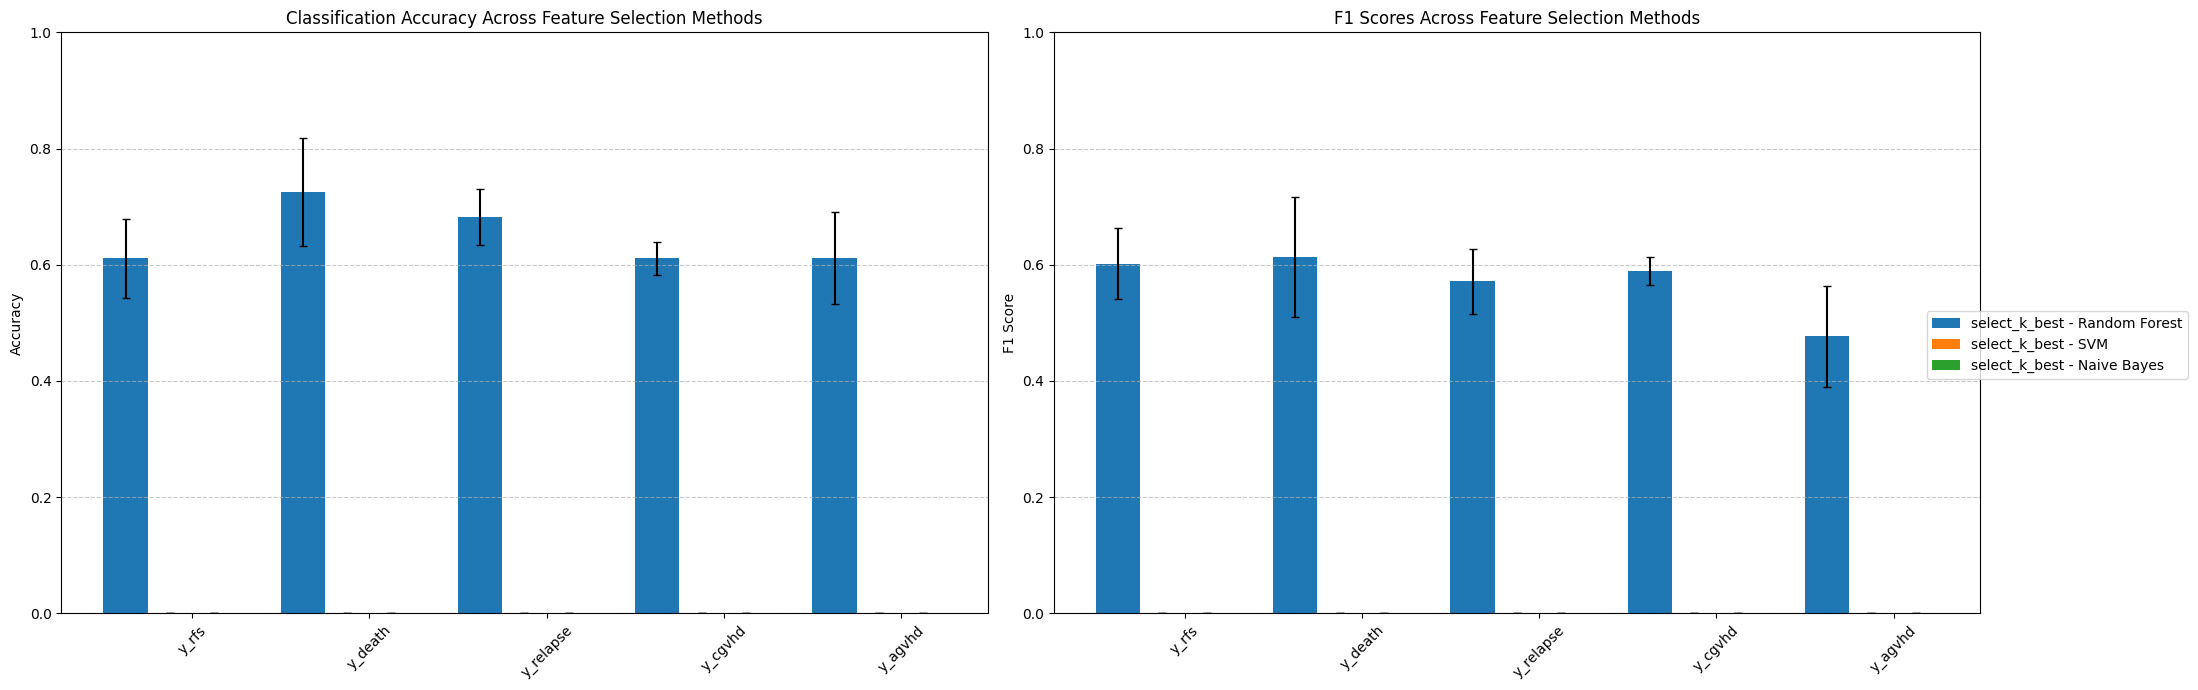

In [14]:
# remove the time from diagnois to allocate & disease_risk_index & alm_eln_risk_cateogry & hct_ci_score
# run different K for random forest (fibonnaci sequence)
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(X_preprocessed, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

In [15]:
select_features_and_train(X_preprocessed, y_classification)

Training model with k=1, features: ['d(60-100)_cd3+']
Model saved to models/Random_Forest_k1.joblib
Training model with k=2, features: ['d(60-100)_cd3+', 'd(60-100)_cd3-']
Model saved to models/Random_Forest_k2.joblib
Training model with k=3, features: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-']
Model saved to models/Random_Forest_k3.joblib
Training model with k=5, features: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'std_ch+', 'std_ch-']
Model saved to models/Random_Forest_k5.joblib


{1: {'Random Forest': {'model': RandomForestClassifier(random_state=42),
   'features': ['d(60-100)_cd3+'],
   'filename': 'models/Random_Forest_k1.joblib'}},
 2: {'Random Forest': {'model': RandomForestClassifier(random_state=42),
   'features': ['d(60-100)_cd3+', 'd(60-100)_cd3-'],
   'filename': 'models/Random_Forest_k2.joblib'}},
 3: {'Random Forest': {'model': RandomForestClassifier(random_state=42),
   'features': ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-'],
   'filename': 'models/Random_Forest_k3.joblib'}},
 5: {'Random Forest': {'model': RandomForestClassifier(random_state=42),
   'features': ['d100_cd3-',
    'd(60-100)_cd3+',
    'd(60-100)_cd3-',
    'std_ch+',
    'std_ch-'],
   'filename': 'models/Random_Forest_k5.joblib'}}}

In [27]:
X

,age,disease,disease_state_at_transplant,mrd_status_prior_to_transplant,donor_type,cd34+_dose,donor_age,hla_matched_mismatched,degree_of_match,mac_or_ric,...,d(60-100)_cd3+,d(30-60)_cd3-,d(60-100)_cd3-,age_reciever_donor_ratio,mean_ch+,mean_ch-,std_ch+,std_ch-,cv_ch+,cv_ch-
0,63.0,1.0,1.0,1.0,1.0,4.66,62.0,1.0,2,2.0,...,2.0,0.0,0.0,1.016129,97.666667,100.000000,1.527525,0.000000,0.015640,0.000000
1,69.0,1.0,1.0,0.0,1.0,4.80,60.0,1.0,2,1.0,...,2.0,0.0,0.0,1.150000,95.333333,100.000000,1.154701,0.000000,0.012112,0.000000
2,51.0,1.0,1.0,0.0,2.0,5.00,19.0,1.0,3,1.0,...,0.0,0.0,0.0,2.684211,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
3,45.0,1.0,2.0,0.0,1.0,5.00,42.0,1.0,2,1.0,...,-4.0,0.0,0.0,1.071429,90.666667,100.000000,2.309401,0.000000,0.025471,0.000000
4,53.0,1.0,1.0,1.0,3.0,5.00,49.0,2.0,1,1.0,...,-3.0,-1.0,0.0,1.081633,97.666667,99.666667,2.081666,0.577350,0.021314,0.005793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,63.0,1.0,2.0,0.0,1.0,3.50,64.0,1.0,2,2.0,...,1.0,0.0,0.0,0.984375,98.333333,100.000000,1.527525,0.000000,0.015534,0.000000
153,53.0,1.0,3.0,2.0,1.0,5.00,54.0,1.0,2,2.0,...,0.0,0.0,0.0,0.981481,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
154,53.0,1.0,1.0,3.0,1.0,6.00,51.0,1.0,2,2.0,...,-1.0,-1.0,1.0,1.039216,97.666667,98.333333,0.577350,0.577350,0.005911,0.005871
155,52.0,1.0,1.0,3.0,2.0,3.90,59.0,1.0,0,2.0,...,40.0,0.0,5.0,0.881356,85.666667,98.333333,23.094011,2.886751,0.269580,0.029357


In [ ]:
df.dropna()

In [42]:
test_df = df[df["disease"] != 1][['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'std_ch+', 'std_ch-', "y_relapse"]].copy()
test_df.dropna(subset=["d(60-100)_cd3-"], inplace=True)
test_df.info()

x_test = preprocess_data(test_df[['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'std_ch+', 'std_ch-']])
y_test = test_df["y_relapse"]

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 257
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   d100_cd3-       60 non-null     float64
 1   d(60-100)_cd3+  60 non-null     float64
 2   d(60-100)_cd3-  60 non-null     float64
 3   std_ch+         60 non-null     float64
 4   std_ch-         60 non-null     float64
 5   y_relapse       60 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.3 KB
Preprocessing features...


In [43]:
x_test

,d100_cd3-,d(60-100)_cd3+,d(60-100)_cd3-,std_ch+,std_ch-
0,0.475580,0.273213,-1.001311,-0.221834,0.263245
1,0.475580,-0.083152,-0.415178,-0.693213,-0.427045
2,-0.163692,4.608988,0.464022,3.841337,0.276137
3,0.475580,0.154425,-0.341911,-0.407097,-0.497363
4,-0.628618,3.421105,0.903622,2.325572,0.774211
5,0.417464,-0.083152,-0.268645,0.334135,-0.243827
6,-2.197741,-0.142546,2.368956,0.038245,2.296845
7,0.417464,1.282914,-0.268645,1.014093,-0.427045
8,0.475580,-0.083152,-0.341911,-0.585071,-0.497363
9,0.475580,-0.855276,-0.341911,0.069551,-0.497363


In [47]:
import glob
def load_and_evaluate_models(X, y, models_path='models', feature_sets=None):
    """
    Loads trained models for different k values and evaluates their performance.
    
    Parameters:
    -----------
    X : DataFrame
        The feature dataframe containing all possible features
    y : Series or array
        Target variable
    models_path : str, default='models'
        Directory where the trained models are saved
    feature_sets : dict, default=None
        Dictionary mapping k values to feature lists. If None, uses the predefined sets.
    
    Returns:
    --------
    dict
        Dictionary containing model details and performance metrics for each k value
    """
    # Define default feature sets if not provided
    if feature_sets is None:
        feature_sets = {
            1: ['d(60-100)_cd3+'],
            2: ['d(60-100)_cd3+', 'd(60-100)_cd3-'],
            3: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-'],
            5: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'std_ch+', 'std_ch-']
        }
    
    # Check if models directory exists
    if not os.path.exists(models_path):
        raise FileNotFoundError(f"Models directory '{models_path}' not found.")
    
    # Find all model files with k values
    model_files = glob.glob(os.path.join(models_path, "Random_Forest_k*.joblib"))
    
    if not model_files:
        raise FileNotFoundError(f"No model files found in '{models_path}'.")
    
    results = {}
    
    # Process each model file
    for model_file in model_files:
        # Extract k value from filename
        filename = os.path.basename(model_file)
        k = int(filename.split('_k')[-1].split('.')[0])
        
        # Skip if k is not in our feature sets
        if k not in feature_sets:
            print(f"Skipping model with k={k} as feature set is not defined.")
            continue
        
        print(f"Evaluating model with k={k}")
        
        # Load the model
        model = joblib.load(model_file)
        
        # Get the features for this k value
        features = feature_sets[k]
        
        # Ensure all features exist in X
        missing_features = [f for f in features if f not in X.columns]
        if missing_features:
            print(f"Warning: Features {missing_features} not found in the dataset. Skipping k={k}.")
            continue
        
        # Select features
        X_selected = X[features]
        
        # Make predictions
        y_pred = model.predict(X_selected)
        
        # Calculate accuracy
        accuracy = accuracy_score(y, y_pred)
        
        # Generate classification report and confusion matrix
        report = classification_report(y, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y, y_pred)
        
        # Store results
        results[k] = {
            'model': model,
            'features': features,
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': conf_matrix,
            'filename': model_file
        }
        
        print(f"k={k}, Features: {features}, Accuracy: {accuracy:.4f}")
    
    # Sort results by k value
    results = dict(sorted(results.items()))
    
    return results

# Load and evaluate all models
evaluation = load_and_evaluate_models(x_test, y_test)

# Print accuracies for each k value
for k, result in evaluation.items():
    print(f"k={k}: Accuracy = {result['accuracy']:.4f}")

Evaluating model with k=2
k=2, Features: ['d(60-100)_cd3+', 'd(60-100)_cd3-'], Accuracy: 0.6000
Evaluating model with k=1
k=1, Features: ['d(60-100)_cd3+'], Accuracy: 0.6833
Evaluating model with k=3
k=3, Features: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-'], Accuracy: 0.6167
Evaluating model with k=5
k=5, Features: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'std_ch+', 'std_ch-'], Accuracy: 0.6167
k=1: Accuracy = 0.6833
k=2: Accuracy = 0.6000
k=3: Accuracy = 0.6167
k=5: Accuracy = 0.6167


Selected features for k=1: ['d(60-100)_cd3+']
1: 0.6370967741935484
Selected features for k=2: ['d(60-100)_cd3+', 'd(60-100)_cd3-']
2: 0.6306451612903226
Selected features for k=3: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(60-100)_cd3-']
3: 0.5405241935483871
Selected features for k=5: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
5: 0.5032258064516129
Selected features for k=8: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
8: 0.5032258064516129
Selected features for k=10: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
10: 0.5032258064516129
Selected features for k=13: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
13: 0.5032258064516129
Selected features for k=21: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
21: 0.5032258064516129
Selected features for k=34: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
34: 0.5032258064516129
best_k = 1
mode

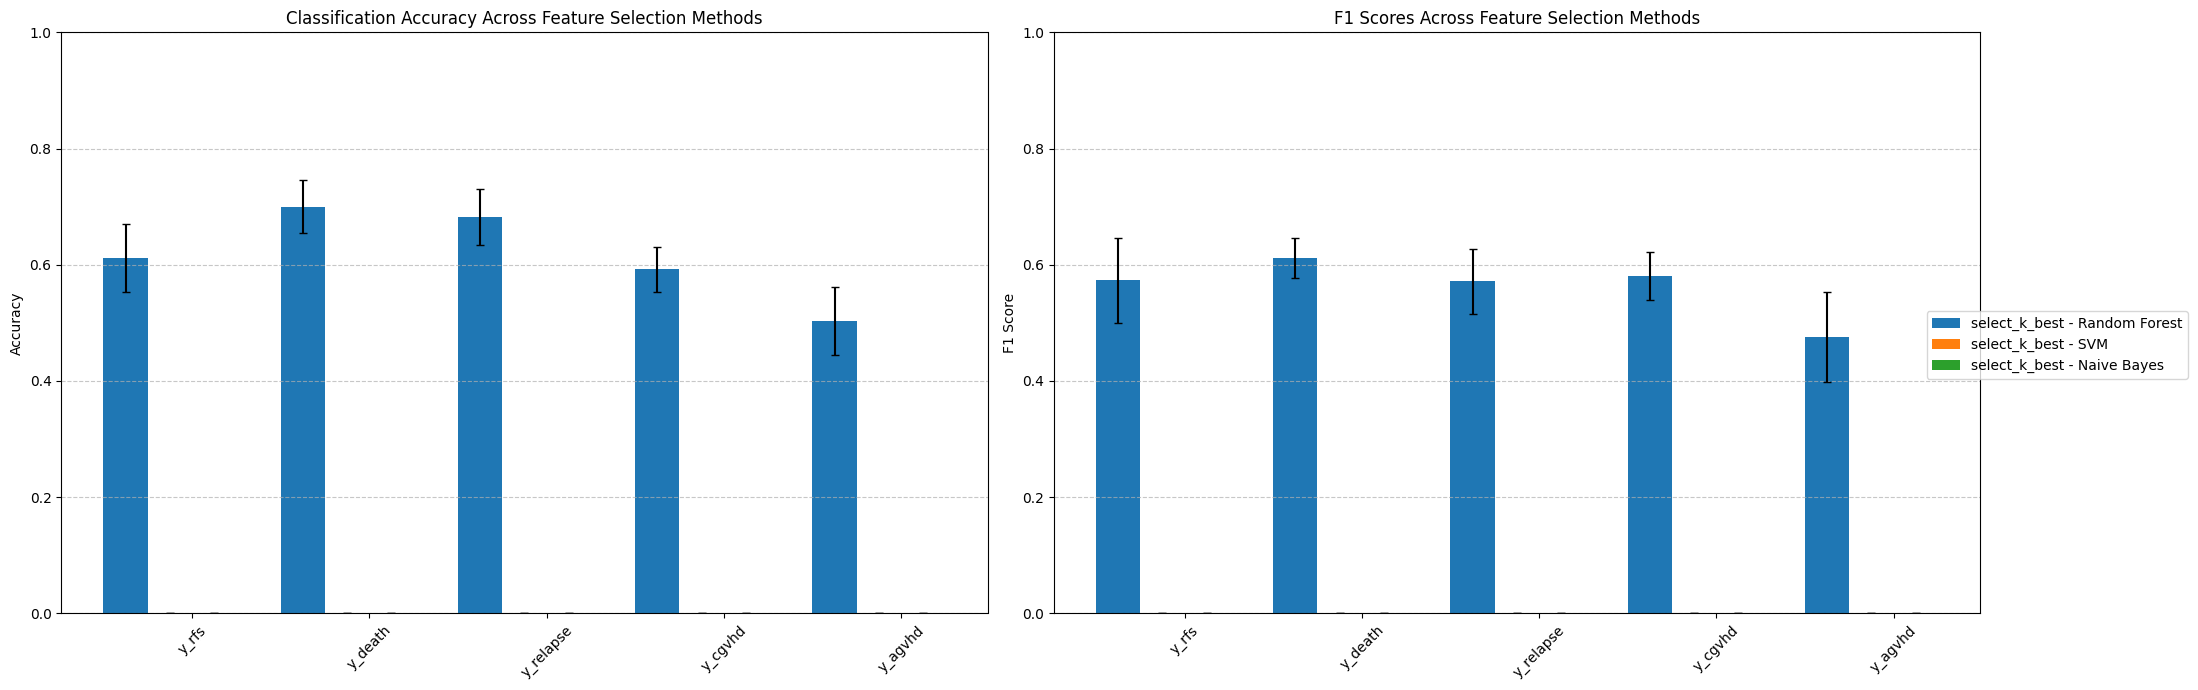

In [17]:
# only select chimerisim dynamic
features = X_preprocessed[["d(30-60)_cd3+", "d(60-100)_cd3+", "d(30-60)_cd3-", "d(60-100)_cd3-"]]
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(features, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

Selected features for k=1: ['d(60-100)_cd3+']
1: 0.6370967741935484
Selected features for k=2: ['d(60-100)_cd3+', 'd100_cd3-']
2: 0.6181451612903226
Selected features for k=3: ['d(60-100)_cd3+', 'd(60-100)_cd3-', 'd100_cd3-']
3: 0.5923387096774193
Selected features for k=5: ['d(60-100)_cd3+', 'd(60-100)_cd3-', 'd30_cd3-', 'd100_cd3+', 'd100_cd3-']
5: 0.5927419354838709
Selected features for k=8: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'd30_cd3-', 'd60_cd3+', 'd60_cd3-', 'd100_cd3+', 'd100_cd3-']
8: 0.5403225806451613
Selected features for k=10: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-', 'd30_cd3+', 'd30_cd3-', 'd60_cd3+', 'd60_cd3-', 'd100_cd3+', 'd100_cd3-']
10: 0.5532258064516129
Selected features for k=13: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-', 'd30_cd3+', 'd30_cd3-', 'd60_cd3+', 'd60_cd3-', 'd100_cd3+', 'd100_cd3-']
13: 0.5532258064516129
Selected features for k=21: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-6

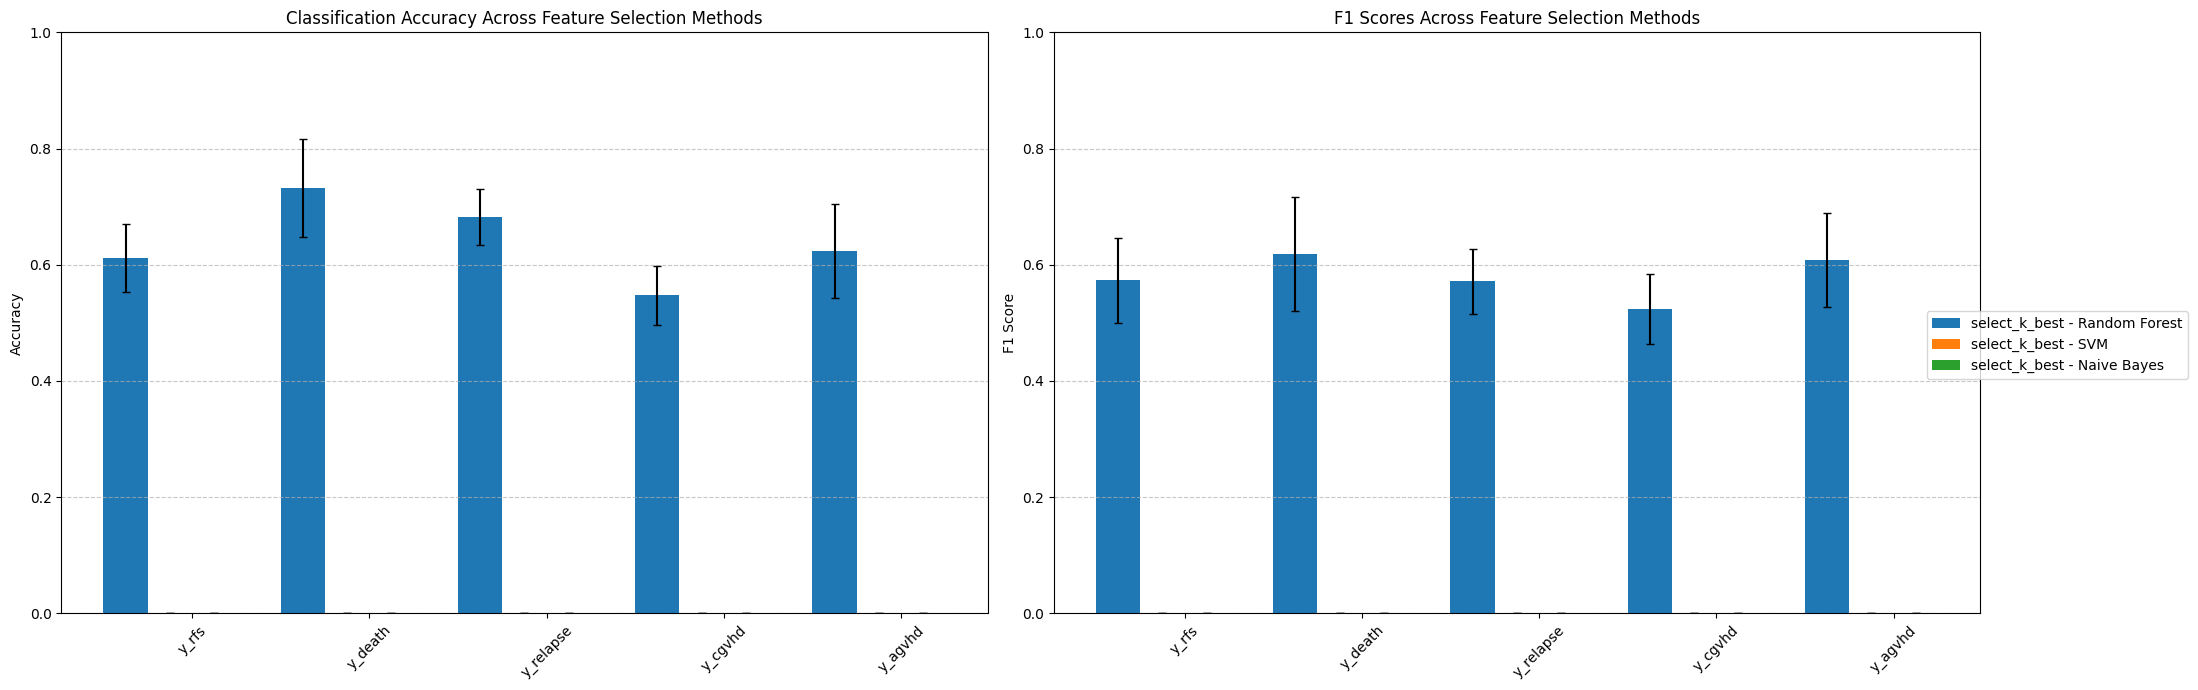

In [19]:
# only select chimerism + chimerism dynamic

# only select chimerisim dynamic
features = X_preprocessed[["d(30-60)_cd3+", "d(60-100)_cd3+", "d(30-60)_cd3-", "d(60-100)_cd3-", "d30_cd3+", "d30_cd3-", "d60_cd3+", "d60_cd3-", "d100_cd3+", "d100_cd3-"]]
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(features, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

In [ ]:
# run a model with a NaN

Selected features for k=1: ['d(60-100)_cd3+']
1: 0.6370967741935484
Selected features for k=2: ['d(60-100)_cd3+', 'd(60-100)_cd3-']
2: 0.6306451612903226
Selected features for k=3: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(60-100)_cd3-']
3: 0.5405241935483871
Selected features for k=5: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
5: 0.5032258064516129
Selected features for k=8: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
8: 0.5032258064516129
Selected features for k=10: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
10: 0.5032258064516129
Selected features for k=13: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
13: 0.5032258064516129
Selected features for k=21: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
21: 0.5032258064516129
Selected features for k=34: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-']
34: 0.5032258064516129
best_k = 1
mode

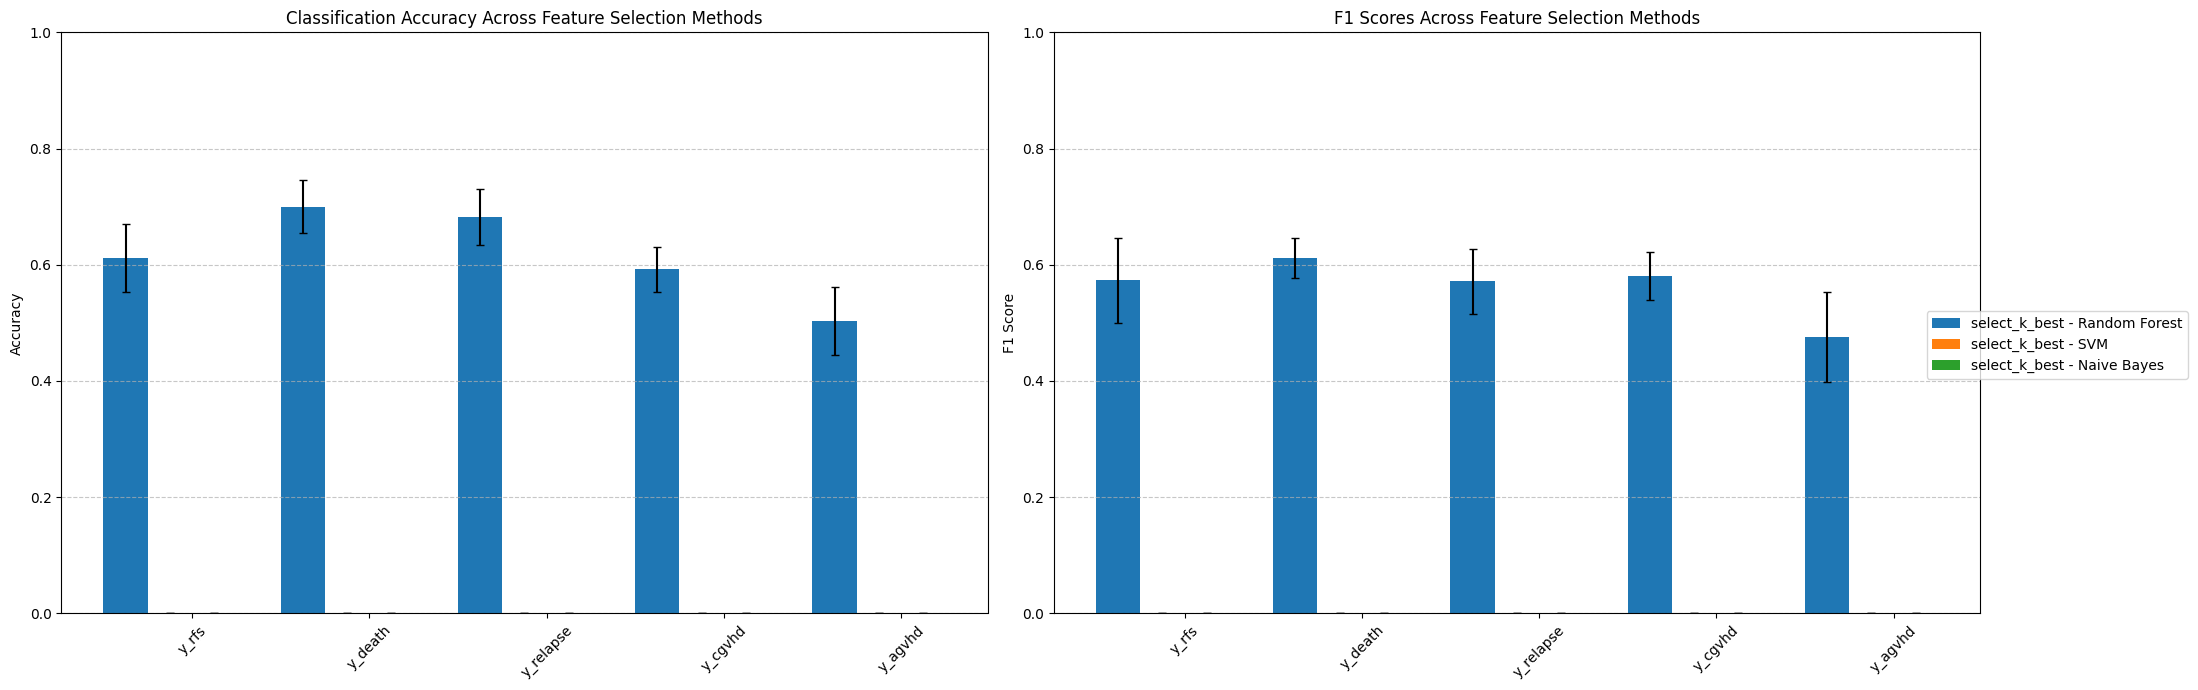

Selected features for k=1: ['d(60-100)_cd3+']
1: 0.6370967741935484
Selected features for k=2: ['d(60-100)_cd3+', 'd100_cd3-']
2: 0.6181451612903226
Selected features for k=3: ['d(60-100)_cd3+', 'd(60-100)_cd3-', 'd100_cd3-']
3: 0.5923387096774193
Selected features for k=5: ['d(60-100)_cd3+', 'd(60-100)_cd3-', 'd30_cd3-', 'd100_cd3+', 'd100_cd3-']
5: 0.5927419354838709
Selected features for k=8: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'd30_cd3-', 'd60_cd3+', 'd60_cd3-', 'd100_cd3+', 'd100_cd3-']
8: 0.5403225806451613
Selected features for k=10: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-', 'd30_cd3+', 'd30_cd3-', 'd60_cd3+', 'd60_cd3-', 'd100_cd3+', 'd100_cd3-']
10: 0.5532258064516129
Selected features for k=13: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-60)_cd3-', 'd(60-100)_cd3-', 'd30_cd3+', 'd30_cd3-', 'd60_cd3+', 'd60_cd3-', 'd100_cd3+', 'd100_cd3-']
13: 0.5532258064516129
Selected features for k=21: ['d(30-60)_cd3+', 'd(60-100)_cd3+', 'd(30-6

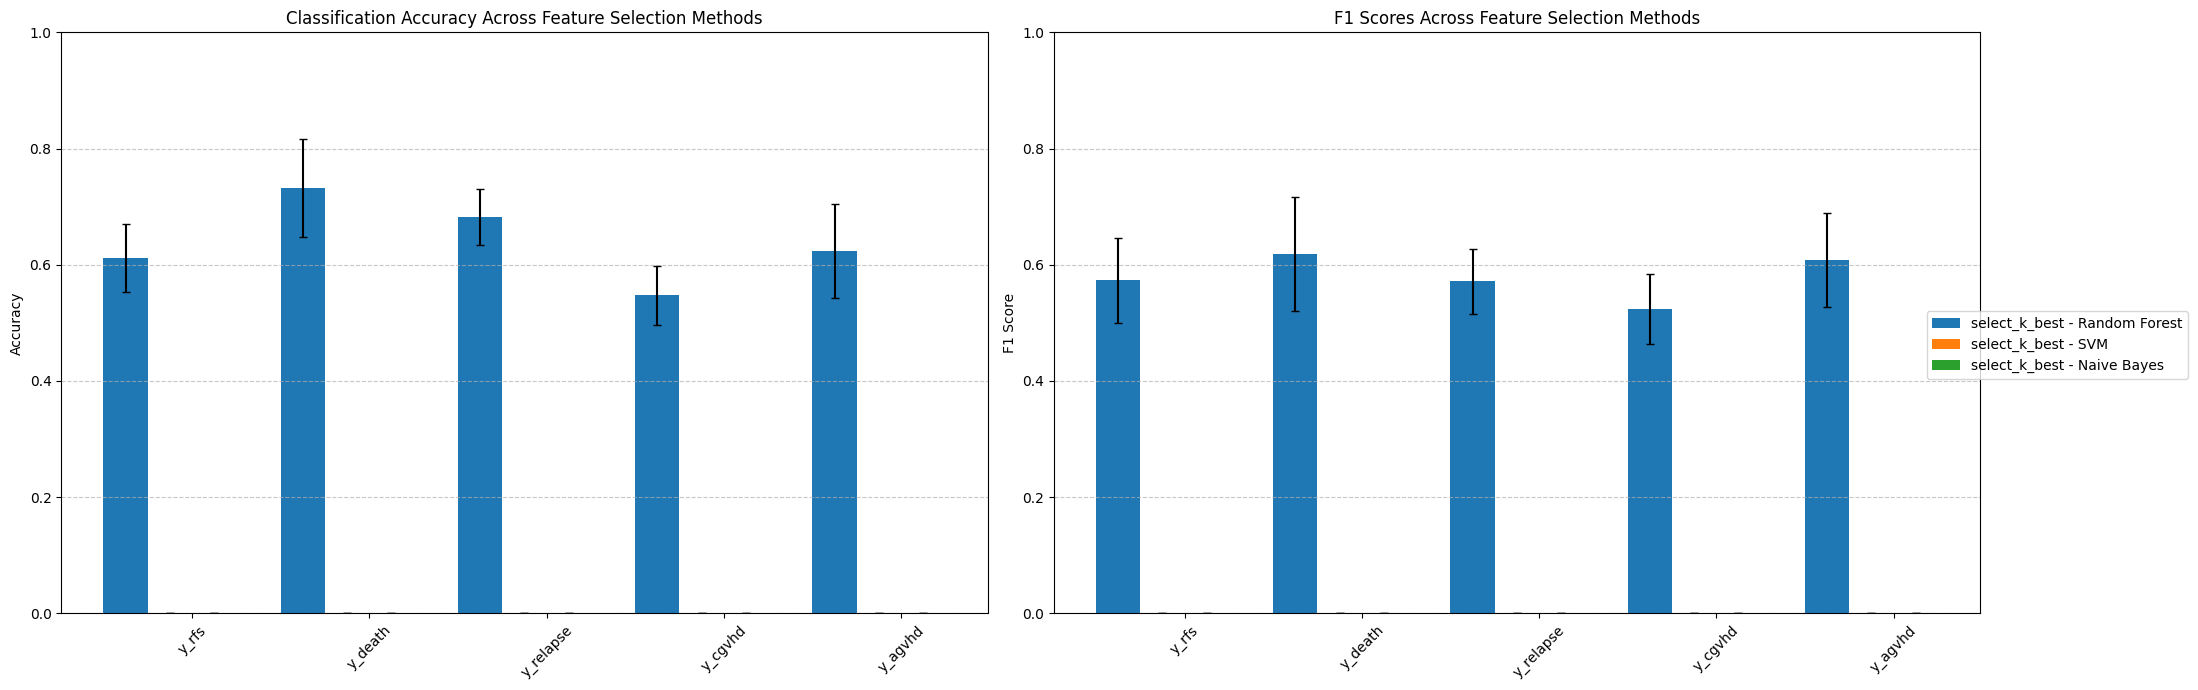

In [20]:
# use exact difference value of chimerism instead of label
# only select chimerisim dynamic
features = X_preprocessed[["d(30-60)_cd3+", "d(60-100)_cd3+", "d(30-60)_cd3-", "d(60-100)_cd3-"]]
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(features, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

# only select chimerisim dynamic
features = X_preprocessed[["d(30-60)_cd3+", "d(60-100)_cd3+", "d(30-60)_cd3-", "d(60-100)_cd3-", "d30_cd3+", "d30_cd3-", "d60_cd3+", "d60_cd3-", "d100_cd3+", "d100_cd3-"]]
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(features, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

Selected features for k=1: ['std_ch-']
1: 0.5868951612903225
Selected features for k=2: ['std_ch+', 'std_ch-']
2: 0.5358870967741935
Selected features for k=3: ['std_ch+', 'std_ch-']
3: 0.5358870967741935
Selected features for k=5: ['std_ch+', 'std_ch-']
5: 0.5358870967741935
Selected features for k=8: ['std_ch+', 'std_ch-']
8: 0.5358870967741935
Selected features for k=10: ['std_ch+', 'std_ch-']
10: 0.5358870967741935
Selected features for k=13: ['std_ch+', 'std_ch-']
13: 0.5358870967741935
Selected features for k=21: ['std_ch+', 'std_ch-']
21: 0.5358870967741935
Selected features for k=34: ['std_ch+', 'std_ch-']
34: 0.5358870967741935
best_k = 1
model_filename = 'models/y_rfs_Random_Forest_1.joblib'
Selected features for k=1: ['std_ch-']
1: 0.6820564516129033
Selected features for k=2: ['std_ch+', 'std_ch-']
2: 0.5993951612903226
Selected features for k=3: ['std_ch+', 'std_ch-']
3: 0.5993951612903226
Selected features for k=5: ['std_ch+', 'std_ch-']
5: 0.5993951612903226
Selected fea

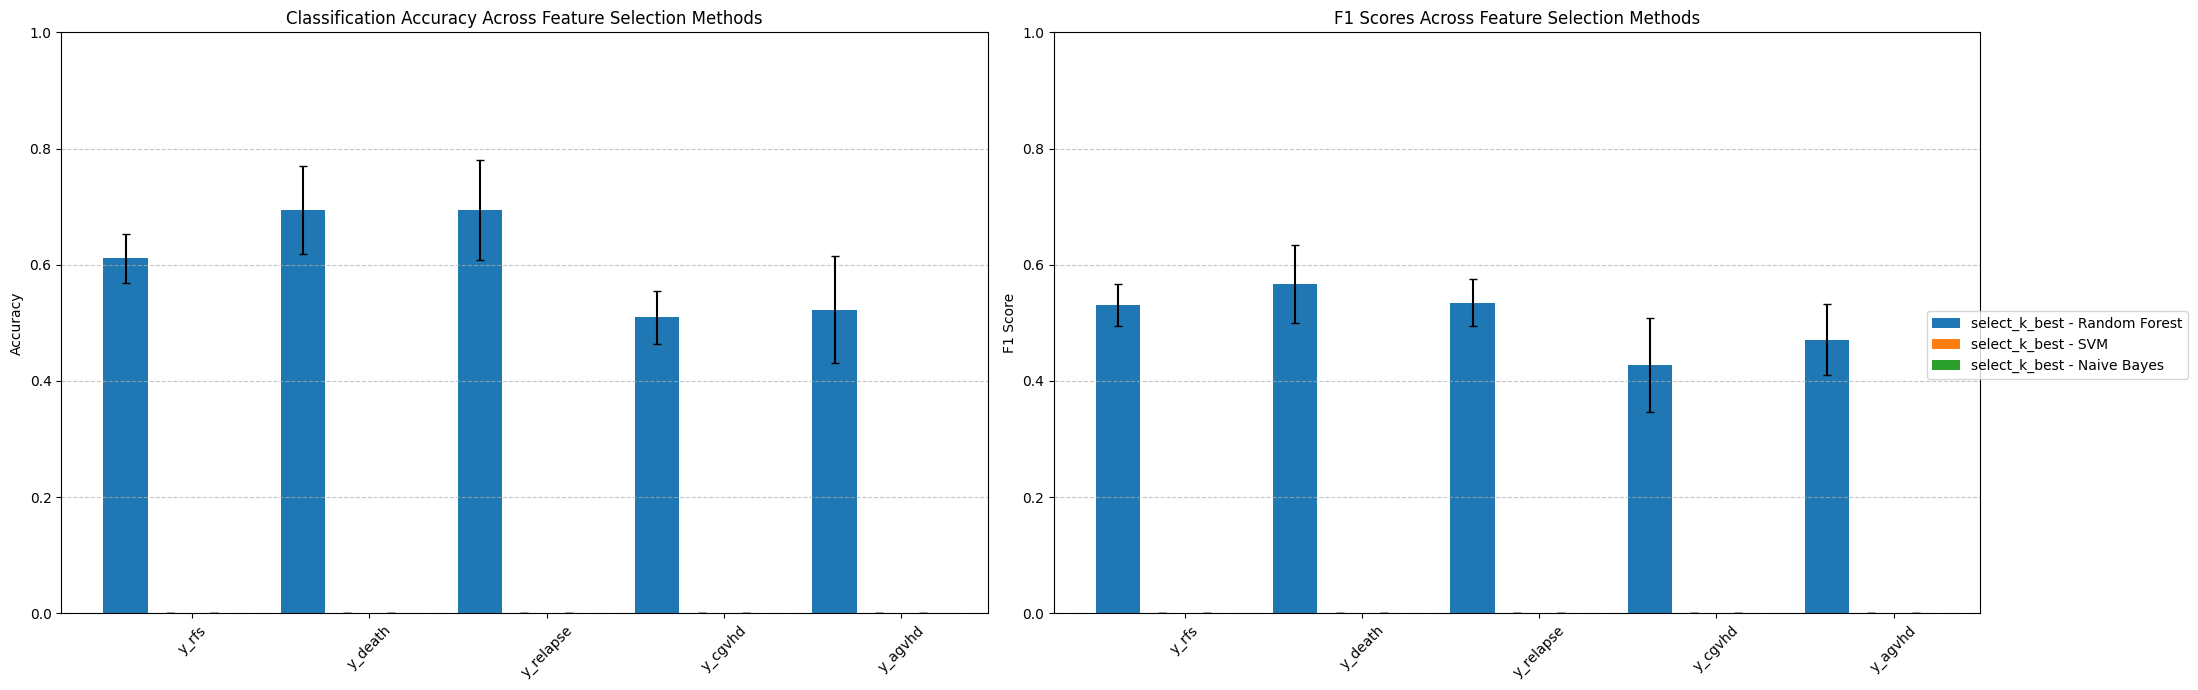

In [21]:
# Calculate chimerism's variance
# only select chimerisim dynamic
features = X_preprocessed[["std_ch+", "std_ch-"]]
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(features, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

Selected features for k=1: ['mean_ch-']
1: 0.5290322580645161
Selected features for k=2: ['mean_ch+', 'mean_ch-']
2: 0.5858870967741935
Selected features for k=3: ['mean_ch+', 'mean_ch-']
3: 0.5858870967741935
Selected features for k=5: ['mean_ch+', 'mean_ch-']
5: 0.5858870967741935
Selected features for k=8: ['mean_ch+', 'mean_ch-']
8: 0.5858870967741935
Selected features for k=10: ['mean_ch+', 'mean_ch-']
10: 0.5858870967741935
Selected features for k=13: ['mean_ch+', 'mean_ch-']
13: 0.5858870967741935
Selected features for k=21: ['mean_ch+', 'mean_ch-']
21: 0.5858870967741935
Selected features for k=34: ['mean_ch+', 'mean_ch-']
34: 0.5858870967741935
best_k = 2
model_filename = 'models/y_rfs_Random_Forest_2.joblib'
Selected features for k=1: ['mean_ch-']
1: 0.6243951612903225
Selected features for k=2: ['mean_ch+', 'mean_ch-']
2: 0.6431451612903226
Selected features for k=3: ['mean_ch+', 'mean_ch-']
3: 0.6431451612903226
Selected features for k=5: ['mean_ch+', 'mean_ch-']
5: 0.64314

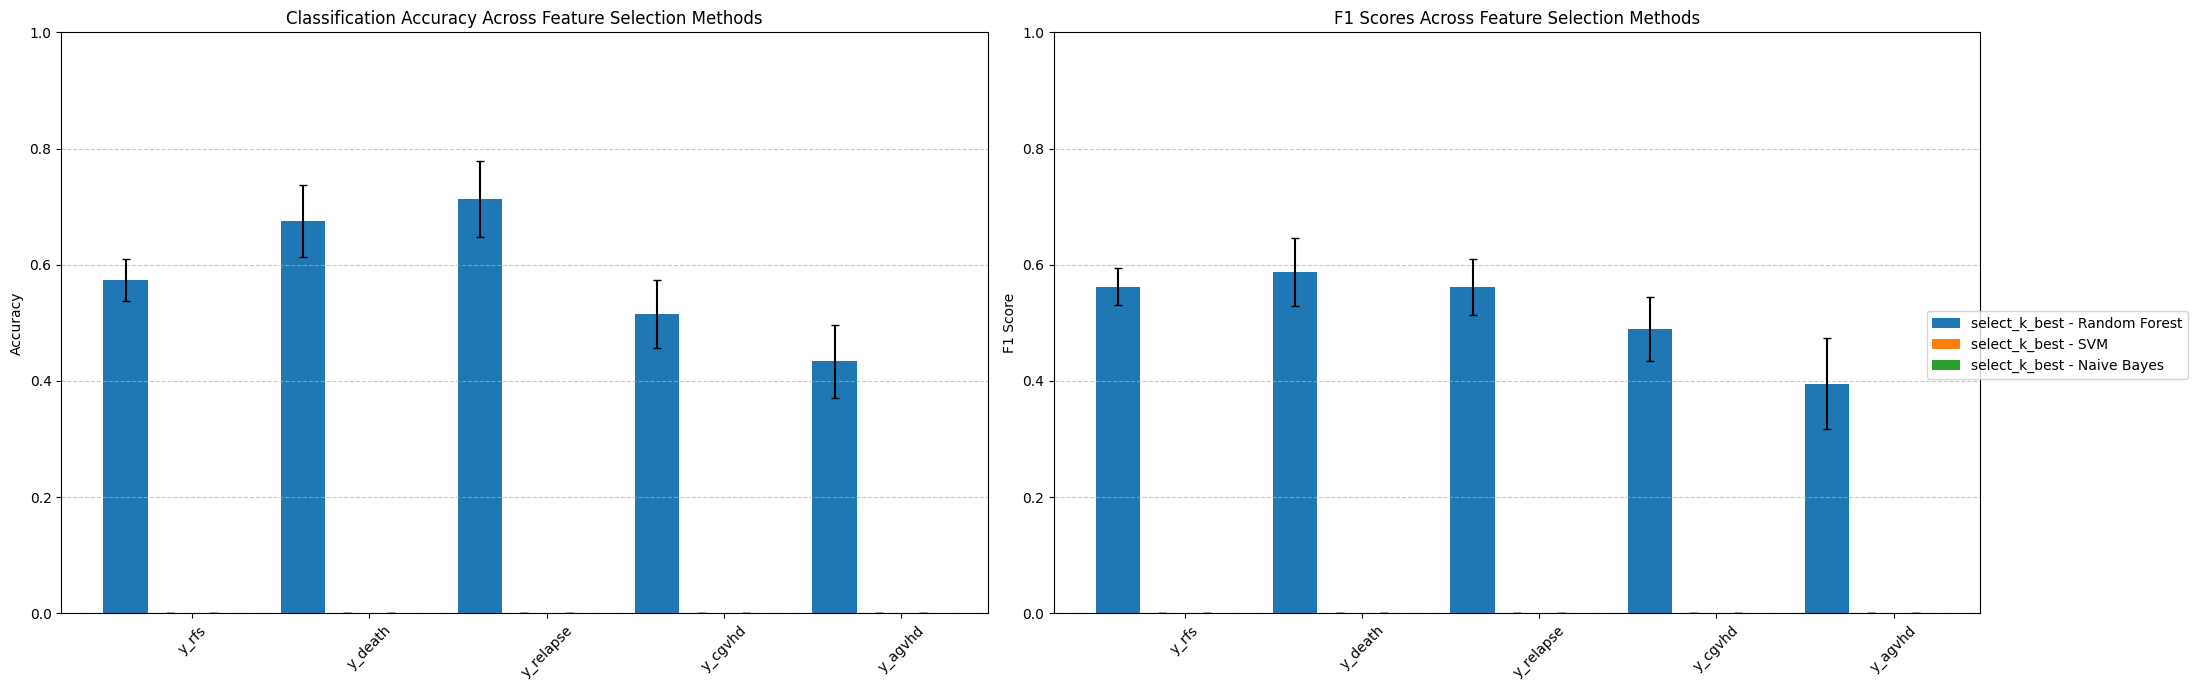

In [22]:
# Calculate chimerism's mean
features = X_preprocessed[["mean_ch+", "mean_ch-"]]
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(features, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

Selected features for k=1: ['cv_ch-']
1: 0.5358870967741935
Selected features for k=2: ['cv_ch+', 'cv_ch-']
2: 0.598991935483871
Selected features for k=3: ['cv_ch+', 'cv_ch-']
3: 0.598991935483871
Selected features for k=5: ['cv_ch+', 'cv_ch-']
5: 0.598991935483871
Selected features for k=8: ['cv_ch+', 'cv_ch-']
8: 0.598991935483871
Selected features for k=10: ['cv_ch+', 'cv_ch-']
10: 0.598991935483871
Selected features for k=13: ['cv_ch+', 'cv_ch-']
13: 0.598991935483871
Selected features for k=21: ['cv_ch+', 'cv_ch-']
21: 0.598991935483871
Selected features for k=34: ['cv_ch+', 'cv_ch-']
34: 0.598991935483871
best_k = 2
model_filename = 'models/y_rfs_Random_Forest_2.joblib'
Selected features for k=1: ['cv_ch-']
1: 0.6439516129032258
Selected features for k=2: ['cv_ch+', 'cv_ch-']
2: 0.6887096774193548
Selected features for k=3: ['cv_ch+', 'cv_ch-']
3: 0.6887096774193548
Selected features for k=5: ['cv_ch+', 'cv_ch-']
5: 0.6887096774193548
Selected features for k=8: ['cv_ch+', 'cv_ch

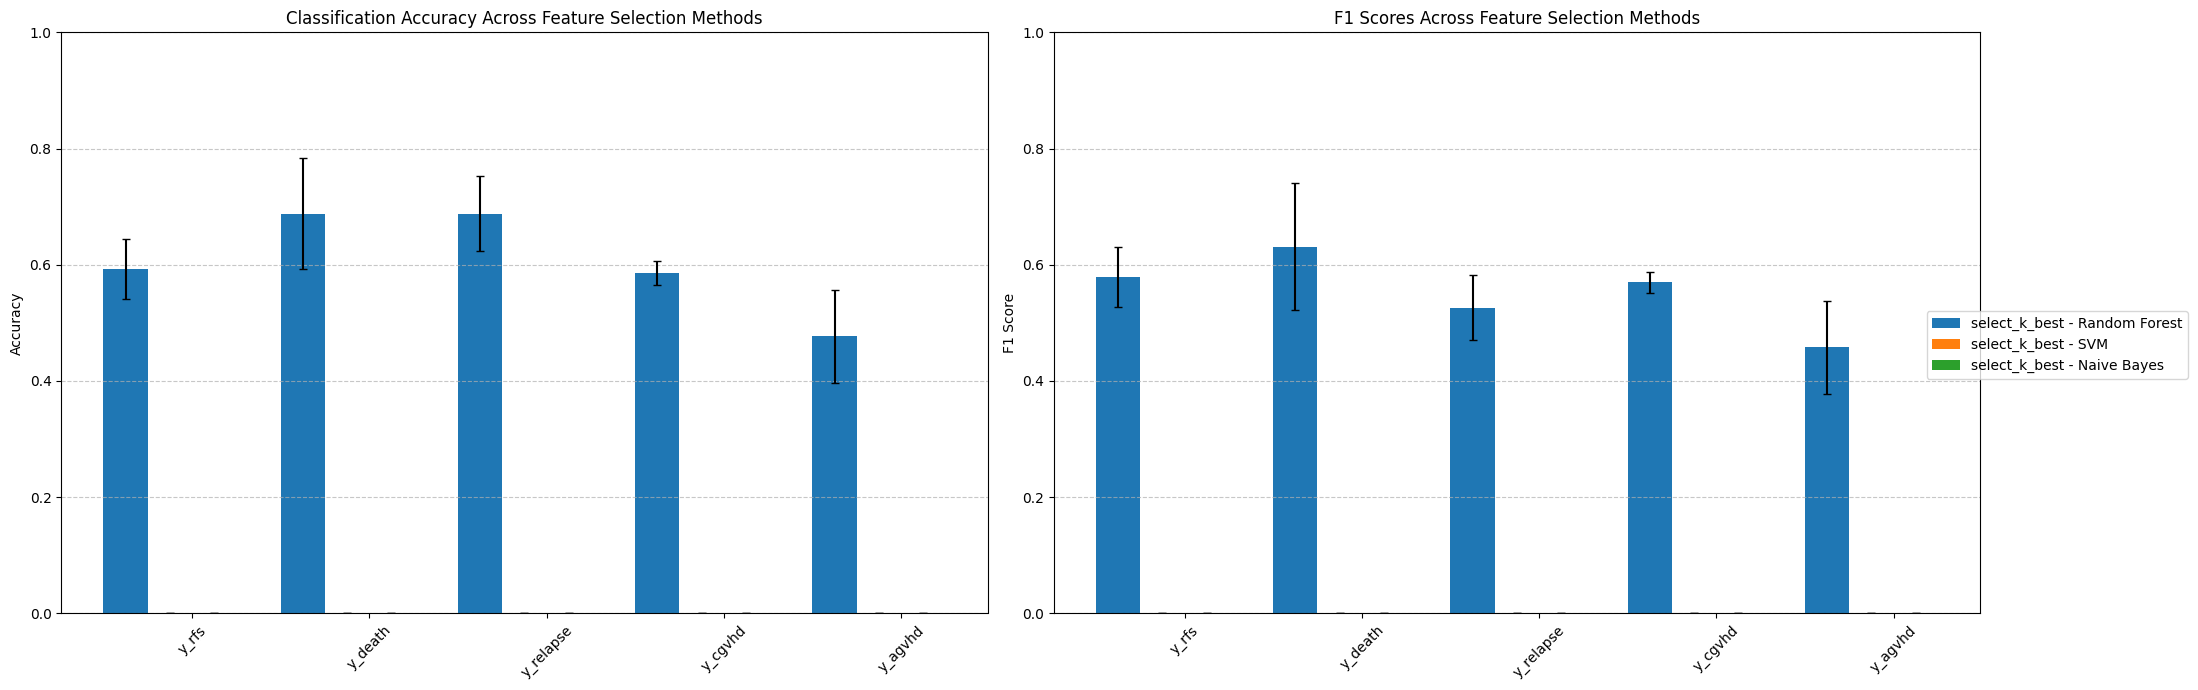

In [23]:
# Calculate chimerism's CV (sd/u)

# Calculate chimerism's mean
features = X_preprocessed[["cv_ch+", "cv_ch-"]]
method = "select_k_best"
classification_results_all = {}
classification_results = train_classification_models(features, y_classification, feature_selection_method=method, k=15)

classification_results_all[method] = classification_results
plot_classification_results(classification_results_all)

In [ ]:
# Print important feature name - done

In [ ]:
# Save model this model, and try to predict the rest of our data. (D(60-100)_ch+) 

# Selected features for k=1: ['d(60-100)_cd3+'] 
# 1: 0.739717741935484
# Selected features for k=2: ['d(60-100)_cd3+', 'd(60-100)_cd3-']
# 2: 0.7203629032258065
# Selected features for k=3: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-']
# 3: 0.7068548387096774
# Selected features for k=5: ['d100_cd3-', 'd(60-100)_cd3+', 'd(60-100)_cd3-', 'std_ch+', 'std_ch-']
# 5: 0.732258064516129